# Oshinowo Final Reserch Project:
# Effects of Social Determinants of Health on Covid Infection and Death Rates
 ## SML 310



<b> The Covid-19 pandemic has magnified disparities present in the U.S Healthcare system. It has also illustrated how social determinants of health (such as living environment, occupation, or income levels) affect disease outcomes for patients. Prior research by the CDC has shown that age, race, and gender are relevant when observing mortality rates across groups. In order to mitigate these inequalities and provide better health outcomes for all patients, it is important to continue studying possible drivers that can contribute to Covid mortality. 

This project examines how certain factors contribute to Covid mortality, from biological information such as age, to social details like education level, to economic factors like the number of beds per hospital. This project is especially interested in how such disparities across US counties influence covid infection and death rates. 

In terms of methodology, this project utilizes several models to study patterns within the data that help to explain the covid outcomes arising across different counties. With each variable, the best and worst off counties are compared to evaluate how that factor may be affecting covid incidence and death rates. 

These findings are important as they quantitatively examine variables that are generally discussed in the news qualitatively (for example, income, education, or hospital capacity). Such an approach is important as it allows one to directly examine divers causing health disparities and provides information on characteristics successful counties possess which aid in successfully combating the Covid-19 pandemic. </b>

## I. Reading in and Cleaning the Data:

<b>The first step in this project was to read in and clean in the data. The excel file "main" consists of the five key sheets which I will consider when conducting my analysis.</b>

<b>covid_income_sheet:</b> Information on county name, state name, county FIPS (Federal Information Processing Standards) code, county type (urban, suburban, rural), total population, number of confirmed cases, number of deaths, deaths per 100,000, per-capita income information, % over 65 years old, % owner occupied home, and % female (all last updated in 2018, except for Covid incidence and Covid deaths, which are from 2020)

<b>beds_sheet:</b> number of beds across all hospitals in the county (last updated 2018, 2019 information delayed due to pandemic)

<b>edu_health_sheet:</b> % of people over age 25 with no high school diploma (per county, last updated in 2016)

<b> unemployment_sheet </b>: unemployment rate per county (last updated 2017)

<b>poverty_sheet</b>: % of population living under the poverty line (per county, last updated 2015) 

<b>median_income_sheet</b>: median household income (per county, last updated 2018) 

Besides the covid-specific information (number of cases and number of deaths), all the data is based off of the 2014-2018 American Community Survey 5-Year Data Release. Although those pieces of data are not from 2020. In observing the changes for these variables across certain years (such as 2016-2017 per capita income percent change or the 2017-2018 per capita income percent change), and noting that these changes are minor (as I will further show in my exploratory data analysis), we can assume that similar numbers would arise in 2020. We will proceed with the assumption that the data from the 2014-2018 surveys are relevant to 2020. 

In [1]:
#import libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import stdev 
from statistics import mean

In [2]:
#Read in the sheets

xl_sheets = pd.ExcelFile(r'C:\Users\Temi\Downloads\main.xlsx')
covid_income_sheet = pd.read_excel(xl_sheets, 'covid_income_sheet')
beds_sheet = pd.read_excel(xl_sheets, 'beds_sheet')
edu_health_sheet = pd.read_excel(xl_sheets, 'edu_health_sheet')
unemployment_sheet = pd.read_excel(xl_sheets, 'unemployment_sheet')
poverty_sheet = pd.read_excel(xl_sheets, 'poverty_sheet')
median_income_sheet = pd.read_excel(xl_sheets, 'median_income_sheet')

# source: https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook

In [3]:
#Viewing the individual pages before merge: covid_income_sheet
covid_income_sheet

state county_name   FIPS   NCHS_urbanization  total_population  \
0     Alabama     Autauga   1001        Medium metro             55200   
1     Alabama     Baldwin   1003         Small metro            208107   
2     Alabama     Barbour   1005            Non-core             25782   
3     Alabama        Bibb   1007  Large fringe metro             22527   
4     Alabama      Blount   1009  Large fringe metro             57645   
...       ...         ...    ...                 ...               ...   
3109  Wyoming  Sweetwater  56037        Micropolitan             44117   
3110  Wyoming       Teton  56039        Micropolitan             23059   
3111  Wyoming       Uinta  56041        Micropolitan             20609   
3112  Wyoming    Washakie  56043            Non-core              8129   
3113  Wyoming      Weston  56045            Non-core              7100   

      confirmed  confirmed_per_100000  deaths  deaths_per_100000  \
0          1383               2505.43      23              41.67   
1          4586               2203.67      42              20.18   
2           617               2393.14       7              27.15   
3           557               2472.59       6              26.63   
4          1070               1856.19      12              20.82   
...         ...                   ...     ...                ...   
3109        309                700.41       2               4.53   
3110        447               1938.51       1               4.34   
3111        308               1494.49       2               9.70   
3112        111               1365.48       6              73.81   
3113         20                281.69       0               0.00   

      2016_per_capita_income  2017_per_capita_income  2018_per_capita_income  \
0                      39561                   40450                   41618   
1                      42907                   43989                   45596   
2                      31595                   33048                   35199   
3                      28799                   29081                   30254   
4                      32389                   33533                   34976   
...                      ...                     ...                     ...   
3109                   47291                   50354                   53145   
3110                  214020                  227753                  251728   
3111                   37634                   38154                   40280   
3112                   43737                   44930                   48184   
3113                   42585                   42816                   44737   

      2018_rank_in_state_per_capita_income  \
0                                       10   
1                                        4   
2                                       41   
3                                       66   
4                                       43   
...                                    ...   
3109                                     8   
3110                                     1   
3111                                    22   
3112                                    15   
3113                                    17   

      2017_per_capita_income_percent_change  \
0                                       2.2   
1                                       2.5   
2                                       4.6   
3                                       1.0   
4                                       3.5   
...                                     ...   
3109                                    6.5   
3110                                    6.4   
3111                                    1.4   
3112                                    2.7   
3113                                    0.5   

      2018_per_capita_income_percent_change  \
0                                       2.9   
1                                       3.7   
2                                       6.5   
3                                  

In [4]:
#Viewing the individual pages before merge: beds_sheet
beds_sheet

FIPS  num_beds
0      2020       753
1      2100        57
2      2122       109
3      2090       212
4      2170       109
...     ...       ...
1432  36019       354
1433  36017       138
1434  36037       133
1435  36051        67
1436  36121       200

[1437 rows x 2 columns]

In [5]:
#Viewing the individual pages before merge: edu_health_sheet
edu_health_sheet

FIPS  2016_percent_no_high_school_diploma_25+  \
0     27077                                   8.5282   
1     53019                                  12.5269   
2     53065                                   9.1339   
3     53047                                  17.6103   
4     53051                                   9.6554   
...     ...                                      ...   
3136   2232                                  -1.0000   
3137   2290                                  18.5017   
3138   2240                                   8.0555   
3139   2068                                   9.1360   
3140   8014                                   5.1600   

      2016_percent_under_65_no_health_insurance  
0                                           8.6  
1                                          16.5  
2                                          13.2  
3                                          18.6  
4                                          11.8  
...                                         ...  
3136                                       -1.0  
3137                                       31.4  
3138                                       24.4  
3139                                       20.9  
3140                                        6.8  

[3141 rows x 3 columns]

In [6]:
#Viewing the individual pages before merge: unemployment_sheet
unemployment_sheet

FIPS  unemployed_percent_2017
0      1001                      3.7
1      1003                      3.6
2      1005                      5.6
3      1007                      4.2
4      1009                      3.9
...     ...                      ...
3214  72145                     11.1
3215  72147                     11.1
3216  72149                     19.0
3217  72151                     15.4
3218  72153                     17.5

[3219 rows x 2 columns]

In [7]:
#Viewing the individual pages before merge: poverty_sheet
poverty_sheet

FIPS poverty_percent_2015
0      1001                 13.5
1      1003                 11.7
2      1005                 29.9
3      1007                 20.1
4      1009                 14.1
...     ...                  ...
3138  56037                  9.8
3139  56039                  7.3
3140  56041                 10.6
3141  56043                 13.1
3142  56045                 10.7

[3143 rows x 2 columns]

In [10]:
#Viewing the individual pages before merge: median_income_sheet
median_income_sheet

FIPS  median_household_income_2018
0         0                       61937.0
1      1000                       49881.0
2      1001                       59338.0
3      1003                       57588.0
4      1005                       34382.0
...     ...                           ...
3191  56037                       73315.0
3192  56039                       99087.0
3193  56041                       63401.0
3194  56043                       55190.0
3195  56045                       54319.0

[3196 rows x 2 columns]

In [11]:
# Merge to see all the counties regardless of if information is missing 

# looking at covid, so only keep rows w/ this
main_all_counties = pd.merge(beds_sheet, edu_health_sheet, on = ['FIPS'], how = 'outer')
main_all_counties = pd.merge(main_all_counties, unemployment_sheet, on = ['FIPS'], how = 'outer')
main_all_counties = pd.merge(main_all_counties, poverty_sheet, on = ['FIPS'], how = 'outer')
main_all_counties = pd.merge(main_all_counties, median_income_sheet, on = ['FIPS'], how = 'outer')
main_all_counties = pd.merge(main_all_counties, covid_income_sheet, on = ['FIPS']) 
#main_all_counties

In [12]:
# Replace NaN in number of beds column with 0s (NOTE: ONLY for this column! Since NaN DOES EQUAL 0 in this case)
main_all_counties['num_beds'] = main_all_counties['num_beds'].fillna(0)
#main_all_counties

In [13]:
# Standardize based on population

# Calculate total population over 1000 
population_over_1000 = main_all_counties.total_population /1000  # total_population divided by 1,000

# Calculate the number of beds per 1000 people, add to dataframe
beds_per_1000 = main_all_counties.num_beds / population_over_1000 
main_all_counties['beds_per_1000'] = beds_per_1000 

# Calculate the number of cases per 1000 people
confirmed_per_1000 = main_all_counties.confirmed / population_over_1000
main_all_counties['confirmed_per_1000'] = confirmed_per_1000 

# Calculate the number of deaths per 1000 people
deaths_per_1000 = main_all_counties.deaths / population_over_1000
main_all_counties['deaths_per_1000'] = deaths_per_1000 

#main_all_counties

In [14]:
# Add Quartiles of interest
# source: https://www.geeksforgeeks.org/finding-the-quantile-and-decile-ranks-of-a-pandas-dataframe-column/
main_all_counties['confirmed_quartile']= pd.qcut(main_all_counties['confirmed_per_1000'],  
                             q = 4, labels = False) 

main_all_counties['deaths_quartile']= pd.qcut(main_all_counties['deaths_per_1000'],  
                             q = 4, labels = False) 

In [15]:
#Rename columns as desired
main_all_counties = main_all_counties.rename(columns={"2016_percent_no_high_school_diploma_25+": "no_diploma_percent", 
                                                       "2016_percent_under_65_no_health_insurance": "no_insurance_percent", 
                                                       "unemployed_percent_2017": "unemployed_percent", 
                                                       "poverty_percent_2015": "poverty_percent", 
                                                       "owner-occupied_housing_unit_rate_2014_to_2018":"owner_occupied_percent", 
                                                       "percent_over_65_2018": "over_65_percent",
                                                       "percent_female_2018": "female_percent",
                                                       "median_household_income_2018": "med_income",
                                                       "2018_per_capita_income": "per_capita_income"})
main_all_counties

FIPS  num_beds  no_diploma_percent  no_insurance_percent  \
0     2020     753.0              7.4656                  16.7   
1     2100      57.0              4.2644                  24.5   
2     2122     109.0              6.7269                  20.9   
3     2090     212.0              6.6466                  16.6   
4     2170     109.0              7.5064                  18.5   
...    ...       ...                 ...                   ...   
3109  2068       0.0              9.1360                  20.9   
3110  2158       0.0                 NaN                   NaN   
3111  2195       0.0                 NaN                   NaN   
3112  2198       0.0                 NaN                   NaN   
3113  2275       0.0                 NaN                   NaN   

      unemployed_percent poverty_percent  med_income   state  \
0                    5.8             7.2     82113.0  Alaska   
1                    7.4            10.3     58943.0  Alaska   
2                    7.6              12     65439.0  Alaska   
3                    6.0             8.5     74268.0  Alaska   
4                    8.2             9.5     74649.0  Alaska   
...                  ...             ...         ...     ...   
3109                 6.2             6.3     75477.0  Alaska   
3110                21.1            37.8     32728.0  Alaska   
3111                 6.7             8.4     66075.0  Alaska   
3112                 9.0            17.5     49356.0  Alaska   
3113                 5.9            11.5     57832.0  Alaska   

                county_name NCHS_urbanization  ...  \
0                 Anchorage      Medium metro  ...   
1                    Haines          Non-core  ...   
2           Kenai Peninsula          Non-core  ...   
3      Fairbanks North Star       Small metro  ...   
4         Matanuska-Susitna      Medium metro  ...   
...                     ...               ...  ...   
3109                 Denali          Non-core  ...   
3110               Kusilvak          Non-core  ...   
3111             Petersburg          Non-core  ...   
3112  Prince of Wales-Hyder          Non-core  ...   
3113               Wrangell          Non-core  ...   

      2018_per_capita_income_percent_change  \
0                                       5.3   
1                                       7.3   
2                                       4.7   
3                                       4.9   
4                                       4.2   
...                                     ...   
3109                                    5.4   
3110                                    0.9   
3111                                    4.9   
3112                                    5.4   
3113                                    6.0   

      rank_in_state_2018_per_capita_income_percent_change  over_65_percent  \
0                                                    12               10.0   
1                                                     3               22.1   
2                                                    15               17.4   
3                                                    14               10.3   
4                                                    18                NaN   
...                                                 ...                ...   
3109                                                 11               11.9   
3110                                                 27                NaN   
3111                                                 13                NaN   
3112                                                 10                NaN   
3113                                                  8               21.9   

      owner_occupied_percent  female_percent  beds_per_1000  \
0                       60.9            49.0       2.542957   
1                       67.4            50.6      22.637014   
2                       73.3            47.9       1.872209   
3                       58.5            4

In [16]:
#View column names and order
main_all_counties_cols = main_all_counties.columns.tolist()
main_all_counties_cols #copy and paste output below, rearrange

['FIPS',
 'num_beds',
 'no_diploma_percent',
 'no_insurance_percent',
 'unemployed_percent',
 'poverty_percent',
 'med_income',
 'state',
 'county_name',
 'NCHS_urbanization',
 'total_population',
 'confirmed',
 'confirmed_per_100000',
 'deaths',
 'deaths_per_100000',
 '2016_per_capita_income',
 '2017_per_capita_income',
 'per_capita_income',
 '2018_rank_in_state_per_capita_income',
 '2017_per_capita_income_percent_change',
 '2018_per_capita_income_percent_change',
 'rank_in_state_2018_per_capita_income_percent_change',
 'over_65_percent',
 'owner_occupied_percent',
 'female_percent',
 'beds_per_1000',
 'confirmed_per_1000',
 'deaths_per_1000',
 'confirmed_quartile',
 'deaths_quartile']

In [17]:
# Reorganize dataframe columns as desired for viewing purposes 
# source: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

main_all_counties_cols= ['FIPS',
                         'state',
                         'county_name',
                         'NCHS_urbanization',
                         'total_population',
                         'num_beds',
                         'confirmed',
                         'deaths',
                         'beds_per_1000',
                         'confirmed_per_1000',
                         'deaths_per_1000',
                         'over_65_percent',
                         'female_percent',
                         'med_income',
                         'per_capita_income',
                         'owner_occupied_percent',                         
                         'no_diploma_percent',
                         'no_insurance_percent',
                         'unemployed_percent',
                         'poverty_percent',
                         'confirmed_quartile',
                         'deaths_quartile',
                         '2018_rank_in_state_per_capita_income',
                         '2016_per_capita_income',
                         '2017_per_capita_income',
                         '2017_per_capita_income_percent_change',
                         '2018_per_capita_income_percent_change',
                         'rank_in_state_2018_per_capita_income_percent_change',
                         'confirmed_per_100000',
                         'deaths_per_100000']


main_all_counties = main_all_counties[main_all_counties_cols]
main_all_counties

FIPS   state            county_name NCHS_urbanization  total_population  \
0     2020  Alaska              Anchorage      Medium metro            296112   
1     2100  Alaska                 Haines          Non-core              2518   
2     2122  Alaska        Kenai Peninsula          Non-core             58220   
3     2090  Alaska   Fairbanks North Star       Small metro             99653   
4     2170  Alaska      Matanuska-Susitna      Medium metro            103464   
...    ...     ...                    ...               ...               ...   
3109  2068  Alaska                 Denali          Non-core              2232   
3110  2158  Alaska               Kusilvak          Non-core              8198   
3111  2195  Alaska             Petersburg          Non-core              3255   
3112  2198  Alaska  Prince of Wales-Hyder          Non-core              6474   
3113  2275  Alaska               Wrangell          Non-core              2484   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  ...  \
0        753.0       3297      25       2.542957           11.134301  ...   
1         57.0          4       0      22.637014            1.588562  ...   
2        109.0        422       2       1.872209            7.248368  ...   
3        212.0        755       9       2.127382            7.576290  ...   
4        109.0        511       2       1.053507            4.938916  ...   
...        ...        ...     ...            ...                 ...  ...   
3109       0.0          2       0       0.000000            0.896057  ...   
3110       0.0          8       0       0.000000            0.975848  ...   
3111       0.0          7       1       0.000000            2.150538  ...   
3112       0.0         28       0       0.000000            4.324992  ...   
3113       0.0         12       0       0.000000            4.830918  ...   

      confirmed_quartile  deaths_quartile  \
0                      1                1   
1                      0                0   
2                      1                0   
3                      1                1   
4                      0                0   
...                  ...              ...   
3109                   0                0   
3110                   0                0   
3111                   0                2   
3112                   0                0   
3113                   0                0   

      2018_rank_in_state_per_capita_income  2016_per_capita_income  \
0                                       10                   62172   
1                                        9                   57423   
2                                       21                   49544   
3                                       19                   52803   
4                                       26                   44520   
...                                    ...                     ...   
3109                                     3                   76113   
3110                                    29                   29979   
3111                                     6                   64029   
3112                                    27                   39834   
3113                                    25                   44956   

      2017_per_capita_income  2017_per_capita_income_percent_change  \
0                      63173                                    1.6   
1                      62478                                    8.8   
2                      49697                                    0.3   
3                      53974                                    2.2   
4                      44043                                   -1.1   
...                      ...                                    ...   
3109                   78685                                    3.4   
3110                   29838                                   -0.5   
3111                   66703                                    4.2   
3112            

In [18]:
# View Entire Dataframe Once
#pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 30)

main_all_counties # Looks as expected!

FIPS   state            county_name NCHS_urbanization  total_population  \
0     2020  Alaska              Anchorage      Medium metro            296112   
1     2100  Alaska                 Haines          Non-core              2518   
2     2122  Alaska        Kenai Peninsula          Non-core             58220   
3     2090  Alaska   Fairbanks North Star       Small metro             99653   
4     2170  Alaska      Matanuska-Susitna      Medium metro            103464   
...    ...     ...                    ...               ...               ...   
3109  2068  Alaska                 Denali          Non-core              2232   
3110  2158  Alaska               Kusilvak          Non-core              8198   
3111  2195  Alaska             Petersburg          Non-core              3255   
3112  2198  Alaska  Prince of Wales-Hyder          Non-core              6474   
3113  2275  Alaska               Wrangell          Non-core              2484   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  \
0        753.0       3297      25       2.542957           11.134301   
1         57.0          4       0      22.637014            1.588562   
2        109.0        422       2       1.872209            7.248368   
3        212.0        755       9       2.127382            7.576290   
4        109.0        511       2       1.053507            4.938916   
...        ...        ...     ...            ...                 ...   
3109       0.0          2       0       0.000000            0.896057   
3110       0.0          8       0       0.000000            0.975848   
3111       0.0          7       1       0.000000            2.150538   
3112       0.0         28       0       0.000000            4.324992   
3113       0.0         12       0       0.000000            4.830918   

      deaths_per_1000  over_65_percent  female_percent  med_income  \
0            0.084428             10.0            49.0     82113.0   
1            0.000000             22.1            50.6     58943.0   
2            0.034352             17.4            47.9     65439.0   
3            0.090313             10.3            46.1     74268.0   
4            0.019330              NaN             NaN     74649.0   
...               ...              ...             ...         ...   
3109         0.000000             11.9            44.3     75477.0   
3110         0.000000              NaN             NaN     32728.0   
3111         0.307220              NaN             NaN     66075.0   
3112         0.000000              NaN             NaN     49356.0   
3113         0.000000             21.9            48.2     57832.0   

      per_capita_income  owner_occupied_percent  no_diploma_percent  \
0                 66510                    60.9              7.4656   
1                 67059                    67.4              4.2644   
2                 52015                    73.3              6.7269   
3                 56606                    58.5              6.6466   
4                 45897                     NaN              7.5064   
...                 ...                     ...                 ...   
3109              82919                    78.1              9.1360   
3110              30099                     NaN                 NaN   
3111              69995                     NaN                 NaN   
3112              43707                     NaN                 NaN   
3113              47658                    68.3                 NaN   

      no_insurance_percent  unemployed_percent poverty_percent  \
0                     16.7                 5.8             7.2   
1                     24.5                 7.4            10.3   
2                     20.9                 7.6              12   
3                     16.6                 6.0             8.5   
4                     18.5                 8.2             9.5   
...                    ...                 ...             ...   
3109        

In [19]:
# Reset rows view to default
pd.options.display.max_rows = 20

# Save DataFrame as csv, just once
#main_all_counties.to_csv(r'C:\Users\Temi\Downloads\main_all_counties.csv', index = False) # Also looks as expected!
main_all_counties

FIPS   state            county_name NCHS_urbanization  total_population  \
0     2020  Alaska              Anchorage      Medium metro            296112   
1     2100  Alaska                 Haines          Non-core              2518   
2     2122  Alaska        Kenai Peninsula          Non-core             58220   
3     2090  Alaska   Fairbanks North Star       Small metro             99653   
4     2170  Alaska      Matanuska-Susitna      Medium metro            103464   
...    ...     ...                    ...               ...               ...   
3109  2068  Alaska                 Denali          Non-core              2232   
3110  2158  Alaska               Kusilvak          Non-core              8198   
3111  2195  Alaska             Petersburg          Non-core              3255   
3112  2198  Alaska  Prince of Wales-Hyder          Non-core              6474   
3113  2275  Alaska               Wrangell          Non-core              2484   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  \
0        753.0       3297      25       2.542957           11.134301   
1         57.0          4       0      22.637014            1.588562   
2        109.0        422       2       1.872209            7.248368   
3        212.0        755       9       2.127382            7.576290   
4        109.0        511       2       1.053507            4.938916   
...        ...        ...     ...            ...                 ...   
3109       0.0          2       0       0.000000            0.896057   
3110       0.0          8       0       0.000000            0.975848   
3111       0.0          7       1       0.000000            2.150538   
3112       0.0         28       0       0.000000            4.324992   
3113       0.0         12       0       0.000000            4.830918   

      deaths_per_1000  over_65_percent  female_percent  med_income  \
0            0.084428             10.0            49.0     82113.0   
1            0.000000             22.1            50.6     58943.0   
2            0.034352             17.4            47.9     65439.0   
3            0.090313             10.3            46.1     74268.0   
4            0.019330              NaN             NaN     74649.0   
...               ...              ...             ...         ...   
3109         0.000000             11.9            44.3     75477.0   
3110         0.000000              NaN             NaN     32728.0   
3111         0.307220              NaN             NaN     66075.0   
3112         0.000000              NaN             NaN     49356.0   
3113         0.000000             21.9            48.2     57832.0   

      per_capita_income  owner_occupied_percent  no_diploma_percent  \
0                 66510                    60.9              7.4656   
1                 67059                    67.4              4.2644   
2                 52015                    73.3              6.7269   
3                 56606                    58.5              6.6466   
4                 45897                     NaN              7.5064   
...                 ...                     ...                 ...   
3109              82919                    78.1              9.1360   
3110              30099                     NaN                 NaN   
3111              69995                     NaN                 NaN   
3112              43707                     NaN                 NaN   
3113              47658                    68.3                 NaN   

      no_insurance_percent  unemployed_percent poverty_percent  \
0                     16.7                 5.8             7.2   
1                     24.5                 7.4            10.3   
2                     20.9                 7.6              12   
3                     16.6                 6.0             8.5   
4                     18.5                 8.2             9.5   
...                    ...                 ...             ...   
3109        

When looking at the 'main_all_counties' dataframe and the generated csv, it is evident that on surface level, the data seems to make sense. In terms of bed count, large cities have more beds and more beds per 1000, while rural/non-core areas are more likely to have no beds (due to no hospitals in the area).  

When I compare consistently <b> across </b> variables (and not within variables), I will only include counties which have information for all variables present. In such cases, I will exclude rows which contain any NaN value. 

In [111]:
# Remove rows with NaN

select_counties = main_all_counties.dropna()

# Save DataFrame as csv, just once
#select_counties.to_csv(r'C:\Users\Temi\Downloads\select_counties.csv', index = False) # Also looks as expected!
select_counties # Also looks as expected!

FIPS     state           county_name NCHS_urbanization  \
0      2020    Alaska             Anchorage      Medium metro   
1      2100    Alaska                Haines          Non-core   
2      2122    Alaska       Kenai Peninsula          Non-core   
3      2090    Alaska  Fairbanks North Star       Small metro   
5      2050    Alaska                Bethel          Non-core   
...     ...       ...                   ...               ...   
3103   2016    Alaska        Aleutians West          Non-core   
3104  51143  Virginia          Pittsylvania      Micropolitan   
3106   2282    Alaska               Yakutat          Non-core   
3108   2240    Alaska   Southeast Fairbanks          Non-core   
3109   2068    Alaska                Denali          Non-core   

      total_population  num_beds  confirmed  deaths  beds_per_1000  \
0               296112     753.0       3297      25       2.542957   
1                 2518      57.0          4       0      22.637014   
2                58220     109.0        422       2       1.872209   
3                99653     212.0        755       9       2.127382   
5                18040      34.0         71       1       1.884701   
...                ...       ...        ...     ...            ...   
3103              5750       0.0          6       0       0.000000   
3104             61676       0.0        856       6       0.000000   
3106               689       0.0         21       0       0.000000   
3108              6876       0.0         19       0       0.000000   
3109              2232       0.0          2       0       0.000000   

      confirmed_per_1000  deaths_per_1000  over_65_percent  female_percent  \
0              11.134301         0.084428             10.0            49.0   
1               1.588562         0.000000             22.1            50.6   
2               7.248368         0.034352             17.4            47.9   
3               7.576290         0.090313             10.3            46.1   
5               3.935698         0.055432              7.7            48.5   
...                  ...              ...              ...             ...   
3103            1.043478         0.000000              6.9            34.5   
3104           13.878980         0.097283             22.6            50.7   
3106           30.478955         0.000000             19.5            44.5   
3108            2.763234         0.000000             14.5            48.0   
3109            0.896057         0.000000             11.9            44.3   

      med_income  per_capita_income  owner_occupied_percent  \
0        82113.0              66510                    60.9   
1        58943.0              67059                    67.4   
2        65439.0              52015                    73.3   
3        74268.0              56606                    58.5   
5        44304.0              43500                    61.1   
...          ...                ...                     ...   
3103     82633.0              54385                    28.1   
3104     44710.0              38497                    75.0   
3106     59523.0              58937                    62.5   
3108     63527.0              49398                    51.5   
3109     75477.0              82919                    78.1   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
0                 7.4656                  16.7                 5.8   
1                 4.2644                  24.5                 7.4   
2                 6.7269                  20.9                 7.6   
3                 6.6466                  16.6                 6.0   
5                19.8098                  26.0                14.9   
...                  ...                   ...                 ...   
3103             14.4956                  25.2                 5.7   
3104             19.7819                  14.3                 4.6   
3106              8.1585                  30.7               

For consistency purposes, I will use the 'select_counties' dataframe to create my models.

## II. Test-Train Split

To explain the differences in deaths and cases, I will now incorporate models and conduct a deeper, analytical dive. 

I will have two separate models, one to predict the cases per 1000, and another to predict deaths per 1000.

In [21]:
#Perform Test Train Split (30%/70%)

#import scikit-learn 
import sklearn
from sklearn.model_selection import train_test_split


<b> First I will work with the confirmed cases. </b>

In [22]:
# Make a copy of 'select_counties' to predict 'confirmed_quartile'
county_cases = select_counties.copy() 

# Remove variables depicting similar things or variables I will predict elsewhere
county_cases = county_cases[['NCHS_urbanization',
                         'deaths_per_1000',
                         'beds_per_1000',
                         'over_65_percent',
                         'female_percent',
                         'med_income',
                         'per_capita_income',
                         'owner_occupied_percent',                         
                         'no_diploma_percent',
                         'no_insurance_percent',
                         'unemployed_percent',
                         'poverty_percent',
                         'confirmed_per_1000',    
                         'confirmed_quartile']]

county_cases

NCHS_urbanization  deaths_per_1000  beds_per_1000  over_65_percent  \
0         Medium metro         0.084428       2.542957             10.0   
1             Non-core         0.000000      22.637014             22.1   
2             Non-core         0.034352       1.872209             17.4   
3          Small metro         0.090313       2.127382             10.3   
5             Non-core         0.055432       1.884701              7.7   
...                ...              ...            ...              ...   
3103          Non-core         0.000000       0.000000              6.9   
3104      Micropolitan         0.097283       0.000000             22.6   
3106          Non-core         0.000000       0.000000             19.5   
3108          Non-core         0.000000       0.000000             14.5   
3109          Non-core         0.000000       0.000000             11.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
0               49.0     82113.0              66510                    60.9   
1               50.6     58943.0              67059                    67.4   
2               47.9     65439.0              52015                    73.3   
3               46.1     74268.0              56606                    58.5   
5               48.5     44304.0              43500                    61.1   
...              ...         ...                ...                     ...   
3103            34.5     82633.0              54385                    28.1   
3104            50.7     44710.0              38497                    75.0   
3106            44.5     59523.0              58937                    62.5   
3108            48.0     63527.0              49398                    51.5   
3109            44.3     75477.0              82919                    78.1   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
0                 7.4656                  16.7                 5.8   
1                 4.2644                  24.5                 7.4   
2                 6.7269                  20.9                 7.6   
3                 6.6466                  16.6                 6.0   
5                19.8098                  26.0                14.9   
...                  ...                   ...                 ...   
3103             14.4956                  25.2                 5.7   
3104             19.7819                  14.3                 4.6   
3106              8.1585                  30.7                 6.5   
3108              8.0555                  24.4                 8.6   
3109              9.1360                  20.9                 6.2   

     poverty_percent  confirmed_per_1000  confirmed_quartile  
0                7.2           11.134301                   1  
1               10.3            1.588562                   0  
2                 12            7.248368                   1  
3                8.5            7.576290                   1  
5               25.5            3.935698                   0  
...              ...                 ...                 ...  
3103               8            1.043478                   0  
3104            13.6           13.878980                   2  
3106            16.8           30.478955                   3  
3108            11.8            2.763234                   0  
3109             6.3            0.896057                   0  

[3105 rows x 14 columns]

In [23]:
# Construct the independent and dependent variables, here dependent is confirmed_quartile
X_cases = county_cases.iloc[:, 0:13] #select all columns except for 'confirmed_per_1000' and 'confirmed_quartile'
Y_cases = county_cases['confirmed_quartile']

X_train_cases, X_test_cases, Y_train_cases, Y_test_cases = train_test_split(X_cases, Y_cases, 
                                                                            test_size = 0.3, 
                                                                            random_state=11) # perform split, "set seed"

# confirm split by checking dimensions
print(X_train_cases.shape)
print(X_test_cases.shape)
print(Y_train_cases.shape)
print(Y_test_cases.shape)
# Dimensions check out

## Convert the two feature sets to 2-dimensional numpy objects
X_train_cases_np = X_train_cases.to_numpy().reshape(-1, 1)
X_test_cases_np = X_test_cases.to_numpy().reshape(-1, 1)


#Make Training Dataframe
X_train_cases_data = X_train_cases.copy() # Add Features
Y_train_cases_list = Y_train_cases.tolist() # Convert Pandas Series to List
X_train_cases_data.loc[:,14] = Y_train_cases_list # add 'confirmed_quartile' values 
X_train_cases_data = X_train_cases_data.rename(columns={14: 'confirmed_quartile'}) #Rename column as 'confirmed_quartile'


#Make Test Dataframe
X_test_cases_data = X_test_cases.copy() # Add Features
Y_test_cases_list = Y_test_cases.tolist() # Convert Pandas Series to List
X_test_cases_data.loc[:,14] = Y_test_cases_list # add 'confirmed_quartile' values 
X_test_cases_data = X_test_cases_data.rename(columns={14: 'confirmed_quartile'}) #Rename 12th column as 'confirmed_quartile'

# confirm X and Y indicies for training data match, which they do 
print(X_train_cases)
print(Y_train_cases)
X_train_cases_data

(2173, 13)
(932, 13)
(2173,)
(932,)
       NCHS_urbanization  deaths_per_1000  beds_per_1000  over_65_percent  \
169          Small metro         0.264607       1.135985              9.2   
1490            Non-core         0.000000       0.000000             25.0   
2551        Micropolitan         0.148599       0.000000             26.8   
305         Medium metro         0.924055       2.205731             17.2   
15              Non-core         0.892201       0.000000             20.4   
...                  ...              ...            ...              ...   
1700            Non-core         0.738098       0.000000             21.7   
333   Large fringe metro         0.045355       1.670585             21.2   
1296  Large fringe metro         0.139110       2.724243             15.9   
1107  Large fringe metro         0.432626       1.571874             14.8   
1948        Micropolitan         0.337648       0.000000             17.9   

      female_percent  med_income  per_c

NCHS_urbanization  deaths_per_1000  beds_per_1000  over_65_percent  \
169          Small metro         0.264607       1.135985              9.2   
1490            Non-core         0.000000       0.000000             25.0   
2551        Micropolitan         0.148599       0.000000             26.8   
305         Medium metro         0.924055       2.205731             17.2   
15              Non-core         0.892201       0.000000             20.4   
...                  ...              ...            ...              ...   
1700            Non-core         0.738098       0.000000             21.7   
333   Large fringe metro         0.045355       1.670585             21.2   
1296  Large fringe metro         0.139110       2.724243             15.9   
1107  Large fringe metro         0.432626       1.571874             14.8   
1948        Micropolitan         0.337648       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

     poverty_percent  confirmed_per_1000  confirmed_quartile  
169             24.9           24.448773                   3  
1490            15.1            0.000000                   0  
2551            16.9           11.219258                   1  
305             13.1           15.149697                   2  
15                30           21.622756                   3  
...              ...                 ...                 ...  
1700            13.1           13.654816                   2  
333             17.5            5.404833                   0  
1296            10.6           14.455876                   2  
1107            10.3           28.711929                   3  
1948            12.9           10.804727                   1  

[2173 rows x 14 columns]

<b> Now I will look at death rates. </b>

In [24]:
# Make a copy of 'select_counties' to predict 'deaths_quartile'
county_deaths = select_counties.copy() 

# Remove variables depicting similar things or variables I will predict elsewhere
county_deaths = county_deaths[['NCHS_urbanization',
                         'confirmed_per_1000',
                         'beds_per_1000',
                         'over_65_percent',
                         'female_percent',
                         'med_income',
                         'per_capita_income',
                         'owner_occupied_percent',                         
                         'no_diploma_percent',
                         'no_insurance_percent',
                         'unemployed_percent',
                         'poverty_percent',
                         'deaths_per_1000',
                         'deaths_quartile']]

county_deaths

NCHS_urbanization  confirmed_per_1000  beds_per_1000  over_65_percent  \
0         Medium metro           11.134301       2.542957             10.0   
1             Non-core            1.588562      22.637014             22.1   
2             Non-core            7.248368       1.872209             17.4   
3          Small metro            7.576290       2.127382             10.3   
5             Non-core            3.935698       1.884701              7.7   
...                ...                 ...            ...              ...   
3103          Non-core            1.043478       0.000000              6.9   
3104      Micropolitan           13.878980       0.000000             22.6   
3106          Non-core           30.478955       0.000000             19.5   
3108          Non-core            2.763234       0.000000             14.5   
3109          Non-core            0.896057       0.000000             11.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
0               49.0     82113.0              66510                    60.9   
1               50.6     58943.0              67059                    67.4   
2               47.9     65439.0              52015                    73.3   
3               46.1     74268.0              56606                    58.5   
5               48.5     44304.0              43500                    61.1   
...              ...         ...                ...                     ...   
3103            34.5     82633.0              54385                    28.1   
3104            50.7     44710.0              38497                    75.0   
3106            44.5     59523.0              58937                    62.5   
3108            48.0     63527.0              49398                    51.5   
3109            44.3     75477.0              82919                    78.1   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
0                 7.4656                  16.7                 5.8   
1                 4.2644                  24.5                 7.4   
2                 6.7269                  20.9                 7.6   
3                 6.6466                  16.6                 6.0   
5                19.8098                  26.0                14.9   
...                  ...                   ...                 ...   
3103             14.4956                  25.2                 5.7   
3104             19.7819                  14.3                 4.6   
3106              8.1585                  30.7                 6.5   
3108              8.0555                  24.4                 8.6   
3109              9.1360                  20.9                 6.2   

     poverty_percent  deaths_per_1000  deaths_quartile  
0                7.2         0.084428                1  
1               10.3         0.000000                0  
2                 12         0.034352                0  
3                8.5         0.090313                1  
5               25.5         0.055432                1  
...              ...              ...              ...  
3103               8         0.000000                0  
3104            13.6         0.097283                1  
3106            16.8         0.000000                0  
3108            11.8         0.000000                0  
3109             6.3         0.000000                0  

[3105 rows x 14 columns]

In [25]:
# Construct the independent and dependent variables, here dependent is deaths_quartile
X_deaths = county_deaths.iloc[:, 0:13] #select all columns except for 'deaths_per_1000' and 'deaths_quartile'
Y_deaths = county_deaths['deaths_quartile']

X_train_deaths, X_test_deaths, Y_train_deaths, Y_test_deaths = train_test_split(X_deaths, Y_deaths, 
                                                                            test_size = 0.3, 
                                                                            random_state=11) # perform split, "set seed"

# confirm split by checking dimensions
print(X_train_deaths.shape)
print(X_test_deaths.shape)
print(Y_train_deaths.shape)
print(Y_test_deaths.shape)
# Dimensions check out

## Convert the two feature sets to 2-dimensional numpy objects
X_train_deaths_np = X_train_deaths.to_numpy().reshape(-1, 1)
X_test_deaths_np = X_test_deaths.to_numpy().reshape(-1, 1)


#Make Training Dataframe
X_train_deaths_data = X_train_deaths.copy() # Add Features
Y_train_deaths_list = Y_train_deaths.tolist() # Convert Pandas Series to List
X_train_deaths_data.loc[:,14] = Y_train_deaths_list # add 'deaths_quartile' values 
X_train_deaths_data = X_train_deaths_data.rename(columns={14: 'deaths_quartile'}) #Rename 14th column as 'deaths_quartile'


#Make Test Dataframe
X_test_deaths_data = X_test_deaths.copy() # Add Features
Y_test_deaths_list = Y_test_deaths.tolist() # Convert Pandas Series to List
X_test_deaths_data.loc[:,14] = Y_test_deaths_list # add 'deaths_quartile' values 
X_test_deaths_data = X_test_deaths_data.rename(columns={14: 'deaths_quartile'}) #Rename 14th column as 'deaths_quartile'

# confirm X and Y indices for training data match, which they do 
print(X_train_deaths)
print(Y_train_deaths)
X_train_deaths_data


(2173, 13)
(932, 13)
(2173,)
(932,)
       NCHS_urbanization  confirmed_per_1000  beds_per_1000  over_65_percent  \
169          Small metro           24.448773       1.135985              9.2   
1490            Non-core            0.000000       0.000000             25.0   
2551        Micropolitan           11.219258       0.000000             26.8   
305         Medium metro           15.149697       2.205731             17.2   
15              Non-core           21.622756       0.000000             20.4   
...                  ...                 ...            ...              ...   
1700            Non-core           13.654816       0.000000             21.7   
333   Large fringe metro            5.404833       1.670585             21.2   
1296  Large fringe metro           14.455876       2.724243             15.9   
1107  Large fringe metro           28.711929       1.571874             14.8   
1948        Micropolitan           10.804727       0.000000             17.9   

   

NCHS_urbanization  confirmed_per_1000  beds_per_1000  over_65_percent  \
169          Small metro           24.448773       1.135985              9.2   
1490            Non-core            0.000000       0.000000             25.0   
2551        Micropolitan           11.219258       0.000000             26.8   
305         Medium metro           15.149697       2.205731             17.2   
15              Non-core           21.622756       0.000000             20.4   
...                  ...                 ...            ...              ...   
1700            Non-core           13.654816       0.000000             21.7   
333   Large fringe metro            5.404833       1.670585             21.2   
1296  Large fringe metro           14.455876       2.724243             15.9   
1107  Large fringe metro           28.711929       1.571874             14.8   
1948        Micropolitan           10.804727       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

     poverty_percent  deaths_per_1000  deaths_quartile  
169             24.9         0.264607                2  
1490            15.1         0.000000                0  
2551            16.9         0.148599                1  
305             13.1         0.924055                3  
15                30         0.892201                3  
...              ...              ...              ...  
1700            13.1         0.738098                3  
333             17.5         0.045355                0  
1296            10.6         0.139110                1  
1107            10.3         0.432626                2  
1948            12.9         0.337648                2  

[2173 rows x 14 columns]

Now that I have created the training and test sets to model confirmed cases per 1000 and deaths per 1000, I will now conduct some exploratory data analysis.

## III. Exploratory Data Analysis

For both the confirmed cases and deaths sets, there are 2484 elements in the training set, and 621 elements in the test set. 

In [26]:
print(Y_train_cases.shape)
print(Y_test_cases.shape)
print(Y_train_deaths.shape)
print(Y_test_deaths.shape)

(2173,)
(932,)
(2173,)
(932,)


<b> First I will work with the confirmed cases. </b>

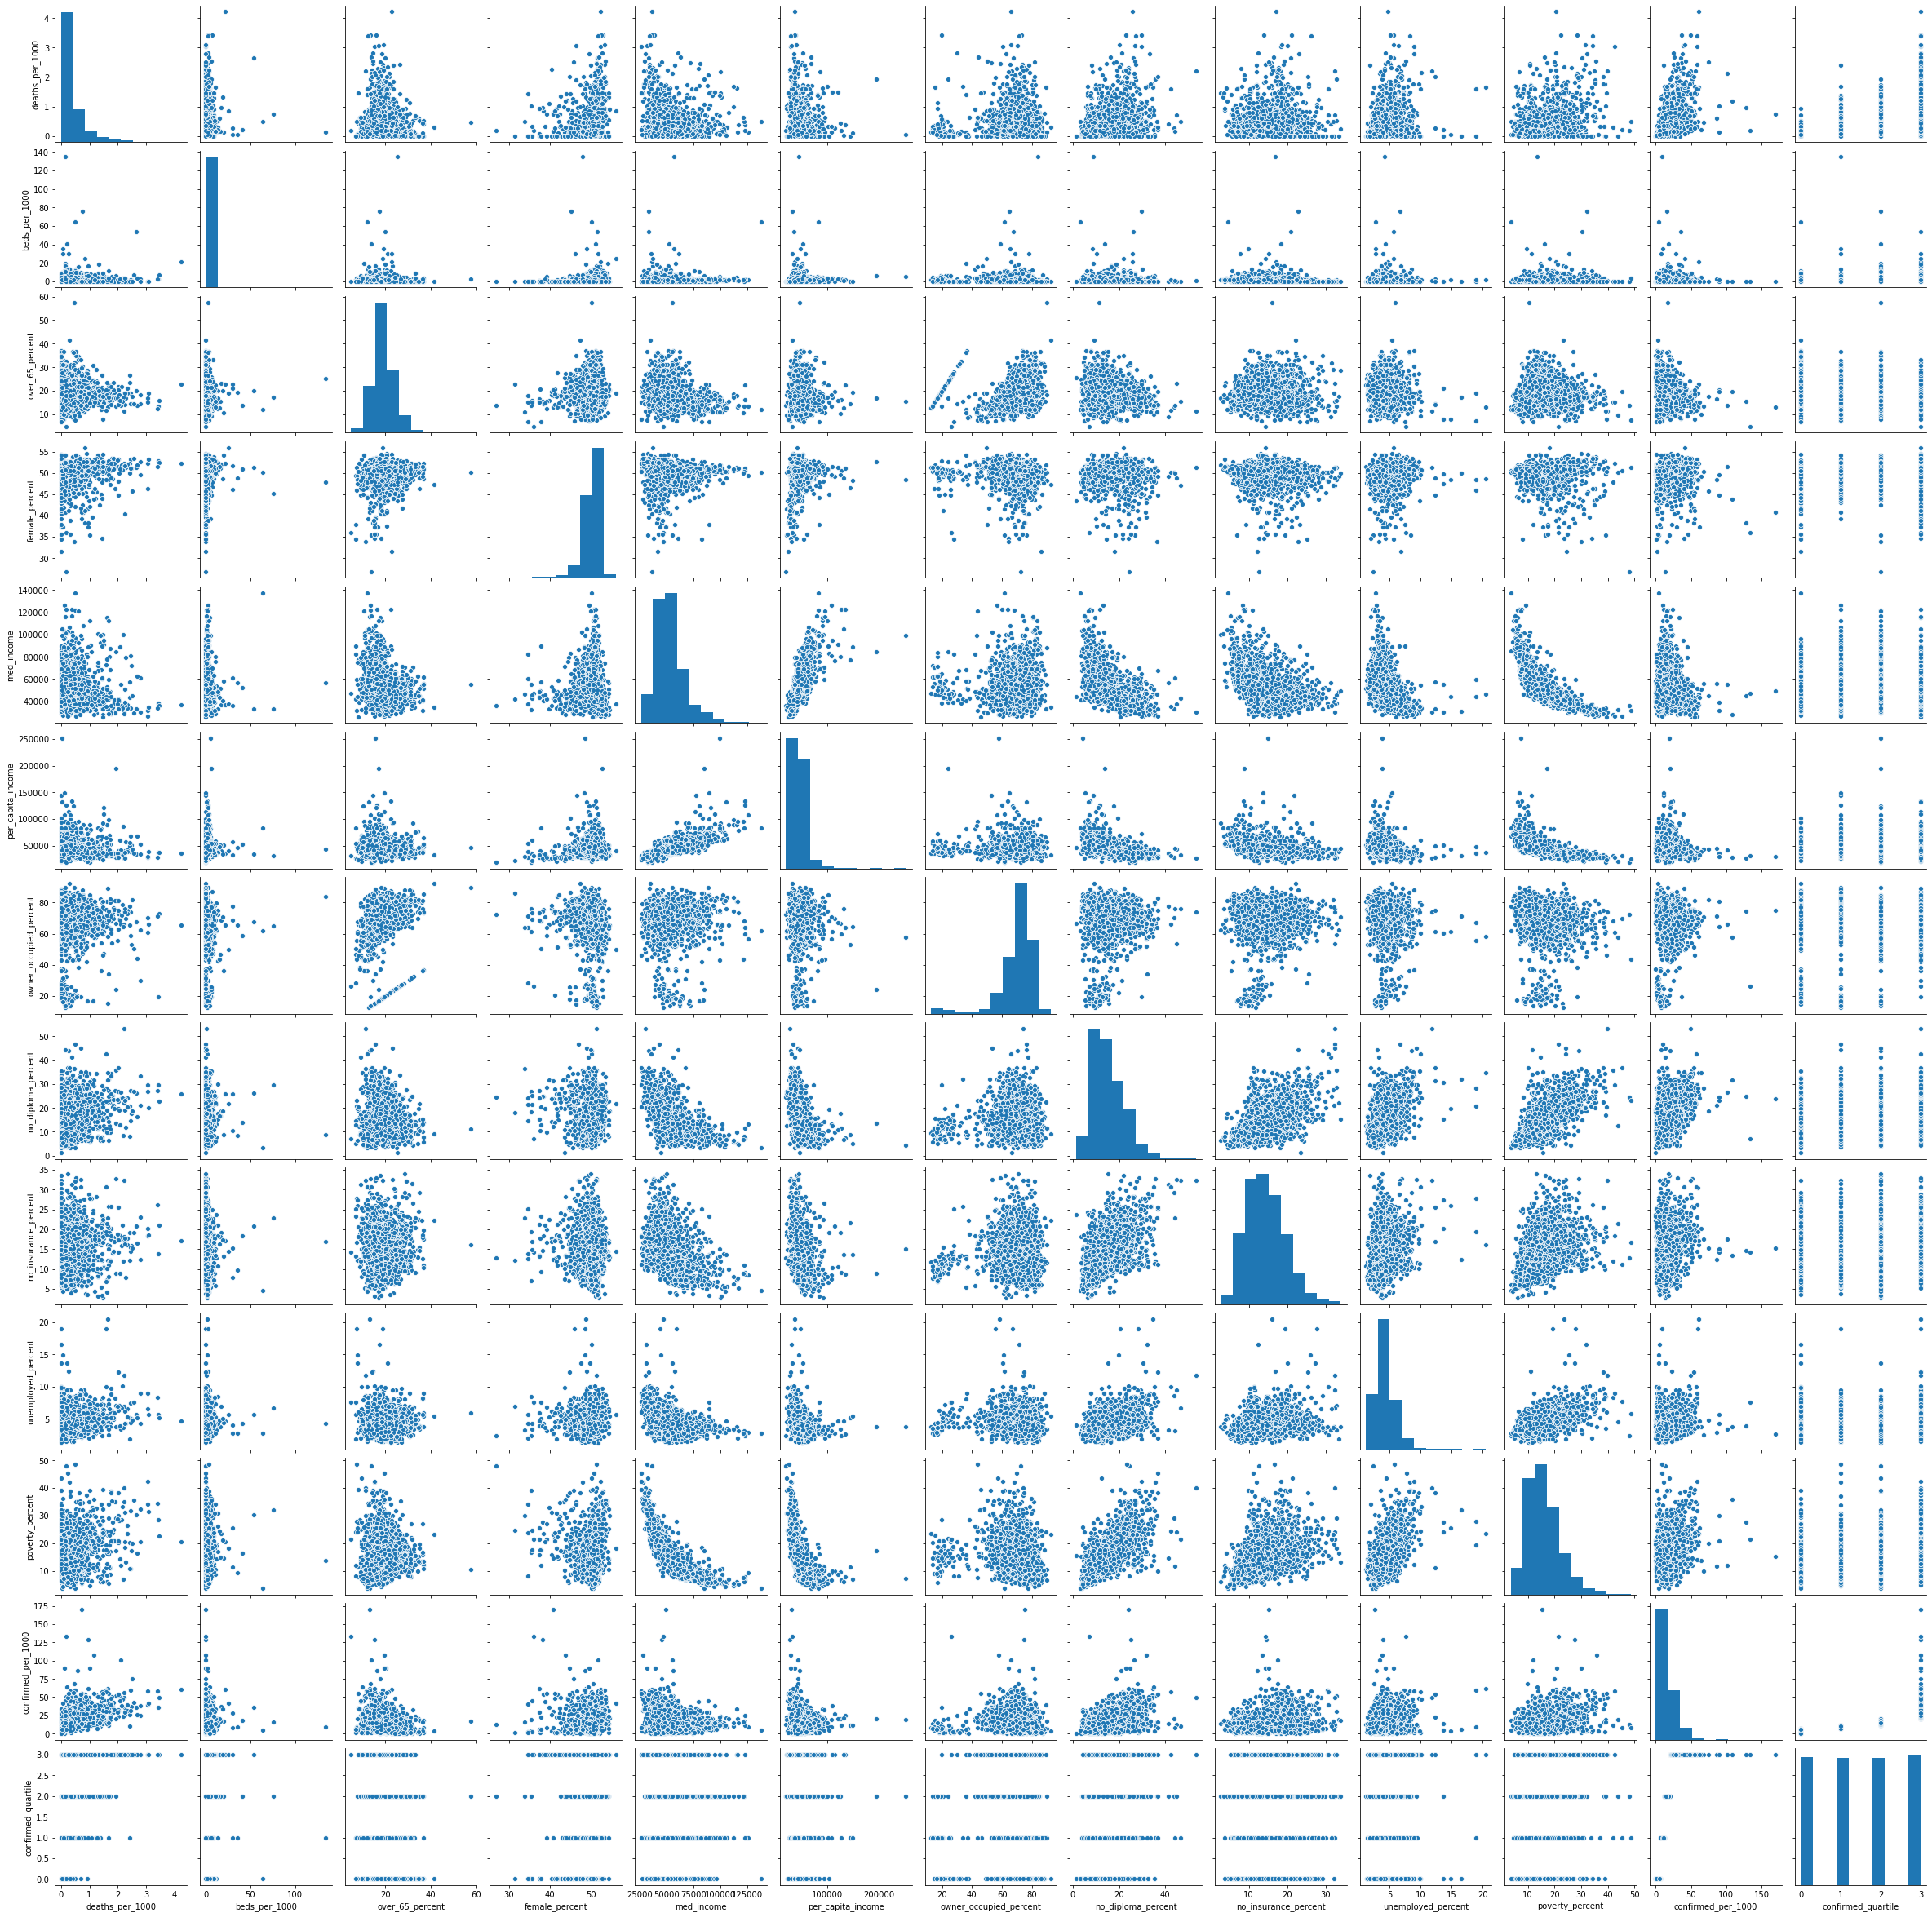

In [27]:
# Exploratory Data Analysis: 

# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(X_train_cases_data)

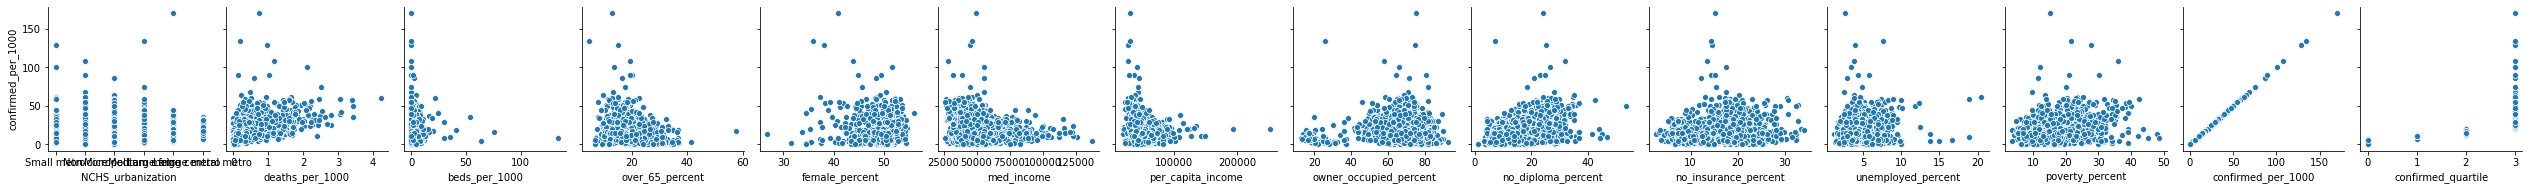

In [28]:
# just looking at row with "confirmed_per_1000"
g1 = sns.pairplot(X_train_cases_data, x_vars = X_train_cases_data.columns, y_vars=["confirmed_per_1000"]) 
g1

* For analysis purposes I will conduct exploratory data analysis on the confirmed cases per 1000, but model on the confirmed cases quartile
* Based on the plots observing cases per 1000, one can see that: 
* In general, covid cases increase total deaths also increases, which makes sense. This is why I will standardize across different populations by focusing on confirmed cases per 1000.
* There appears to be a positive correlation between Covid cases per 1000 and education levels. There also appears to be positive correlations between covid cases per 1000 and lacking health insurance, having more people under the poverty level, and having a higher unemployment rate.
* There appears to be a negative correlation between income (both median household and per-capita) and education level, and also a negative correlation between income and covid incidence (lower income counties seem to have higher incidences of Covid). 
* There appears to be a negative correlation between percentage of people over age 65 and Covid incidence (counties more of an elderly population seem to have higher incidences of Covid). 

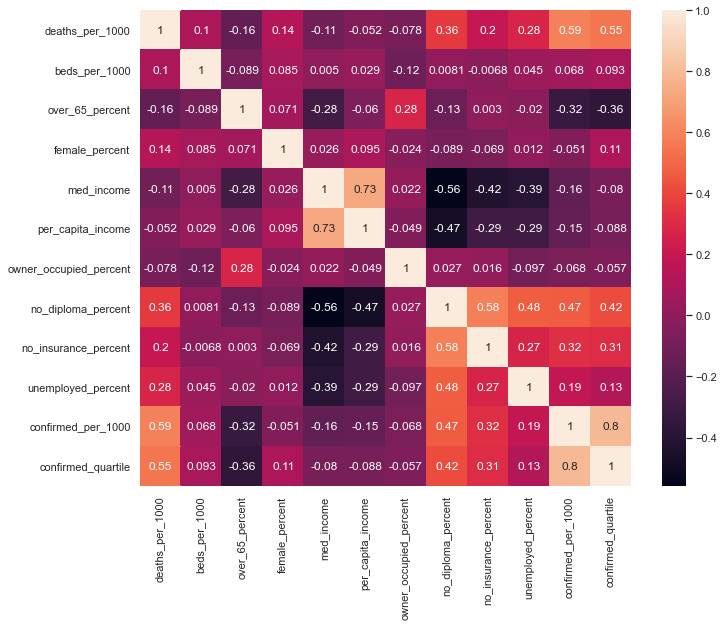

In [29]:
# Display the correlation matrrix
X_train_cases_corr =X_train_cases_data.corr() 
sns.set(rc={'figure.figsize':(11,8.75)})
sns.heatmap(X_train_cases_corr, annot=True)

* Education and Cases per 1000: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


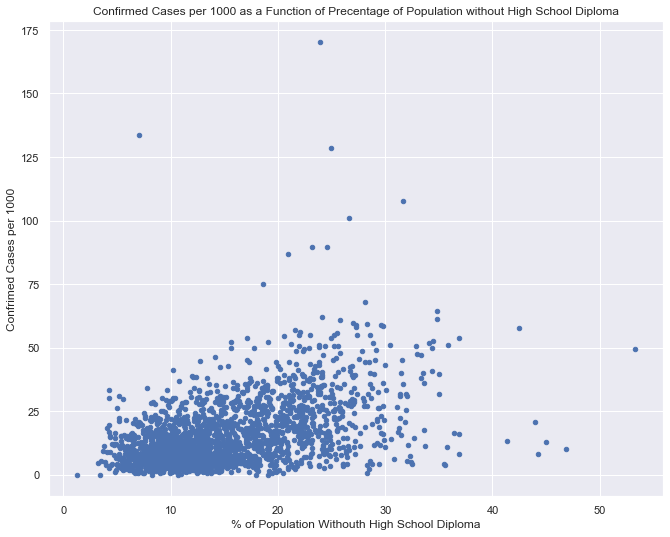

In [30]:
# Make a Scatter Plot of the data 
ax1_train = X_train_cases_data.plot('no_diploma_percent', 'confirmed_per_1000', 'scatter')
ax1_train.set(xlabel='% of Population Withouth High School Diploma', 
              ylabel='Confrimed Cases per 1000', 
              title='Confirmed Cases per 1000 as a Function of Precentage of Population without High School Diploma')
plt.show()


With a correlation coefficient of 0.47, this is intersting, as it demonstrates that across counties in the US, there is a moderate positive correlation between % without a high school diploma and Covid rates per 1000. 

* Insurance and Cases per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


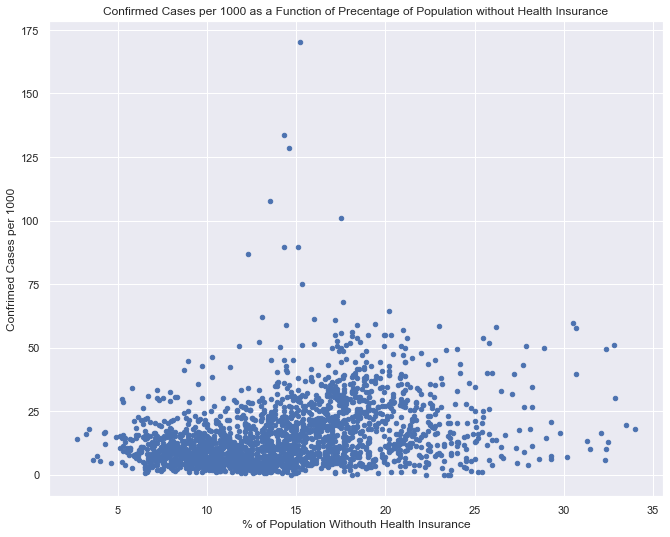

In [31]:
# Make a Scatter Plot of the data 
ax2_train = X_train_cases_data.plot('no_insurance_percent', 'confirmed_per_1000', 'scatter')
ax2_train.set(xlabel='% of Population Withouth Health Insurance', 
              ylabel='Confrimed Cases per 1000', 
              title='Confirmed Cases per 1000 as a Function of Precentage of Population without Health Insurance')
plt.show()


With a correlation coefficient of 0.32 this demonstrates that across counties in the US, there is a slight positive correlation between % lacking health insurance and Covid rates per 1000. 

* Median Household Income and Cases per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


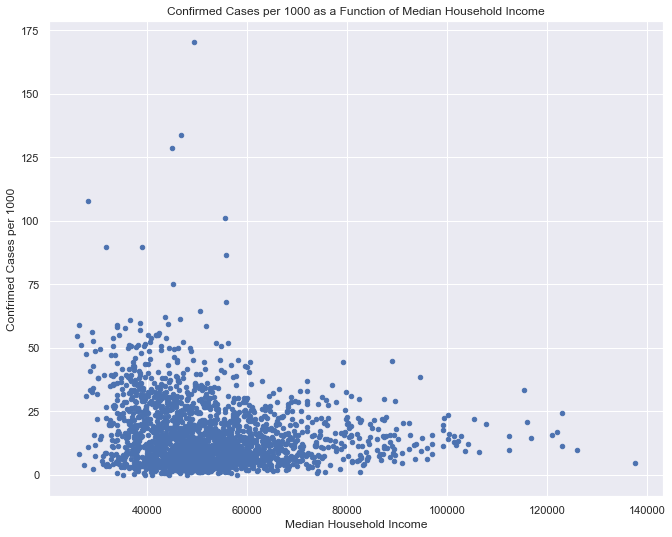

In [32]:
# Make a Scatter Plot of the data 
ax3_train = X_train_cases_data.plot('med_income', 'confirmed_per_1000', 'scatter')
ax3_train.set(xlabel='Median Household Income', 
              ylabel='Confrimed Cases per 1000', 
              title='Confirmed Cases per 1000 as a Function of Median Household Income')
plt.show()



With a correlation coefficient of -0.16 this demonstrates that across counties in the US, there is a minor negative correlation between median household income and Covid rates per 1000. 

* % Over 65 and Cases per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


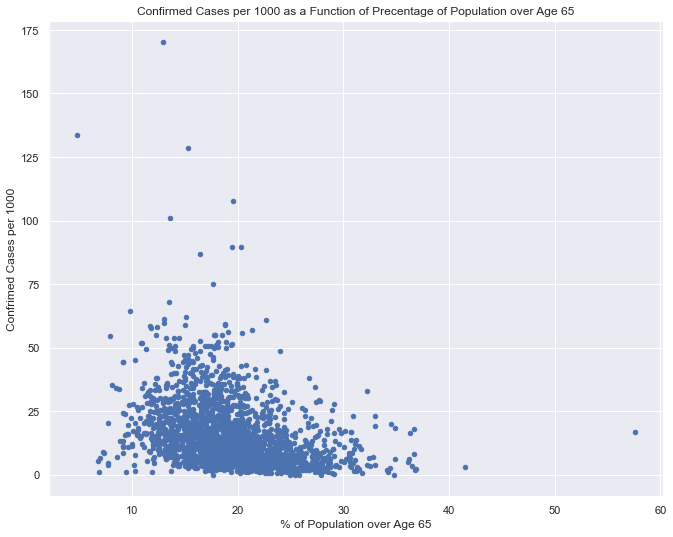

In [33]:
# Make a Scatter Plot of the data 
ax4_train = X_train_cases_data.plot('over_65_percent', 'confirmed_per_1000', 'scatter')
ax4_train.set(xlabel='% of Population over Age 65', 
              ylabel='Confrimed Cases per 1000', 
              title='Confirmed Cases per 1000 as a Function of Precentage of Population over Age 65')
plt.show()


With a correlation coefficient of -0.32 this demonstrates that across counties in the US, there is a slight negative correlation between having an older population and Covid rates per 1000. This was surprising to me, as I expected older population to have hihger rates of confirmed cases. However, the data shows that this is not necessarily the case. 

* % NCHS Classification and Average Number of Cases per 1000:

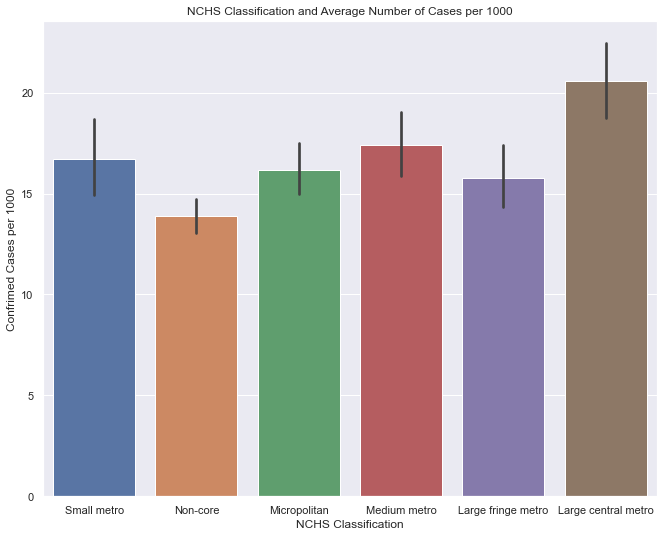

In [34]:
# Make a Scatter Plot of the data 
ax5_train = sns.barplot('NCHS_urbanization', 'confirmed_per_1000', data=X_train_cases_data)
ax5_train.set(xlabel='NCHS Classification', 
              ylabel='Confrimed Cases per 1000', 
              title='NCHS Classification and Average Number of Cases per 1000')
plt.show()


Large central metro regions have significantly more Covid cases compared to non-core rural areas.

<b> Now I will look at death rates. </b>

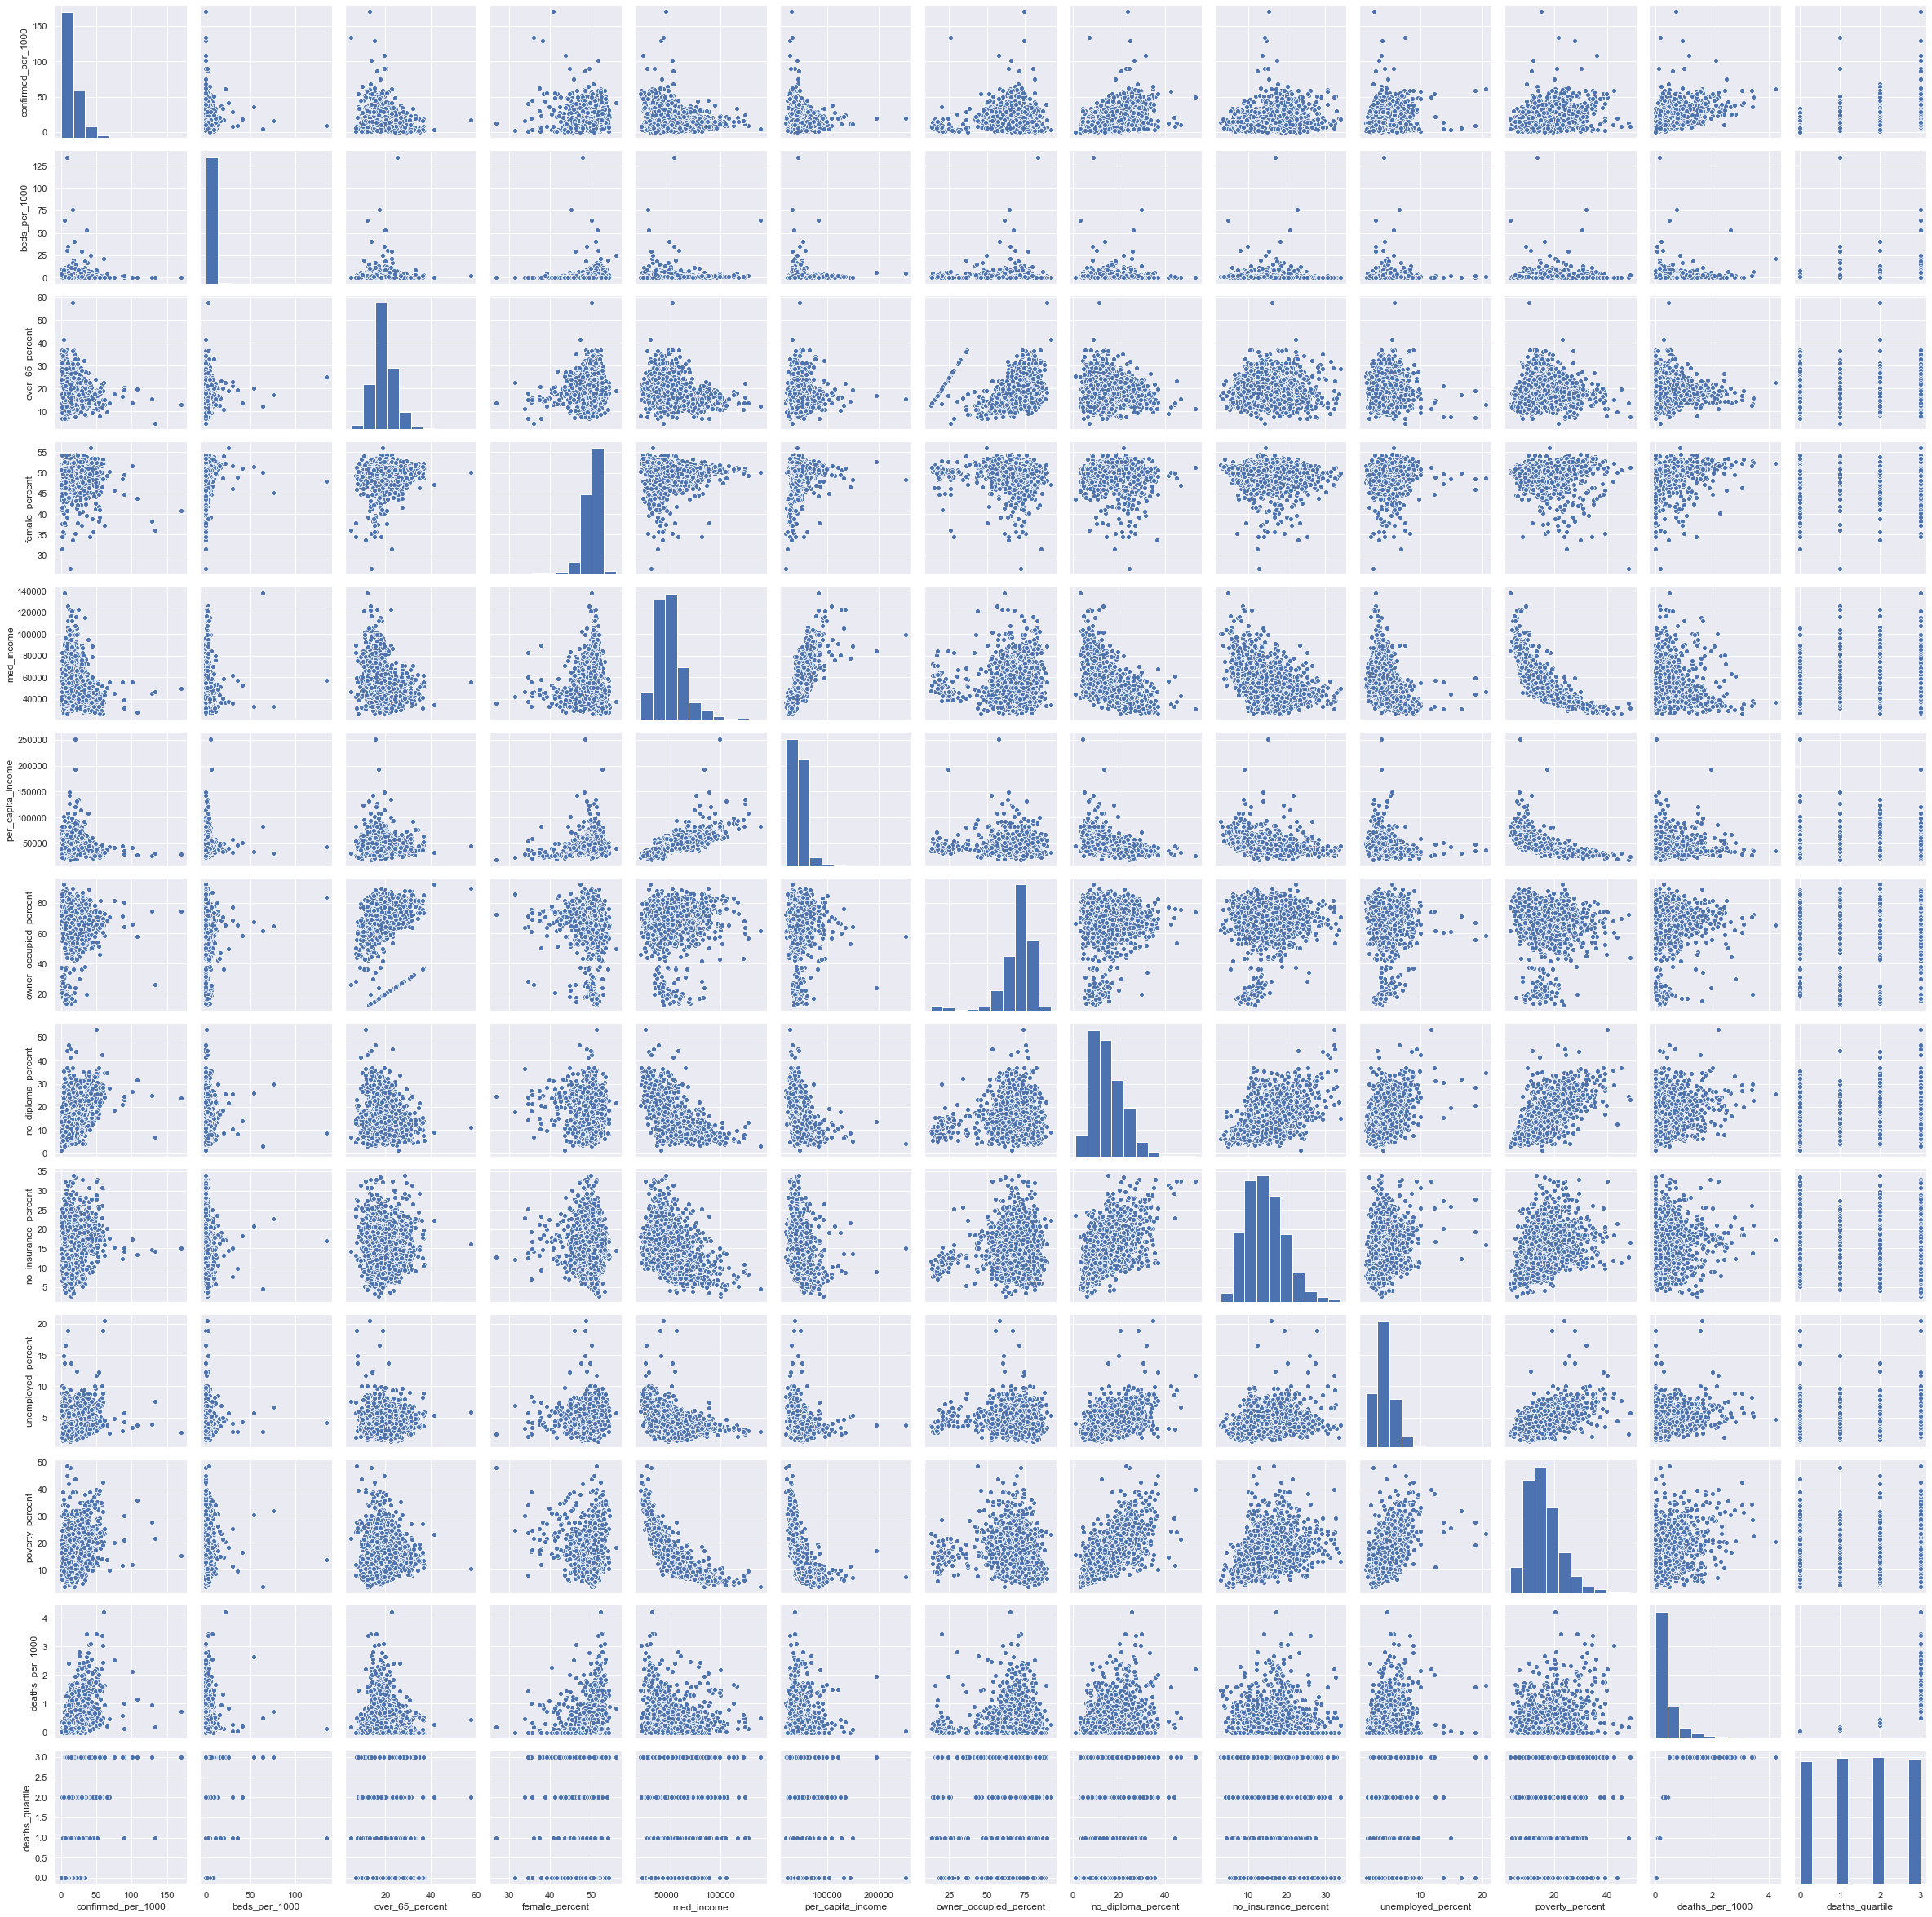

In [35]:
# Create the default pairplot
sns.pairplot(X_train_deaths_data)

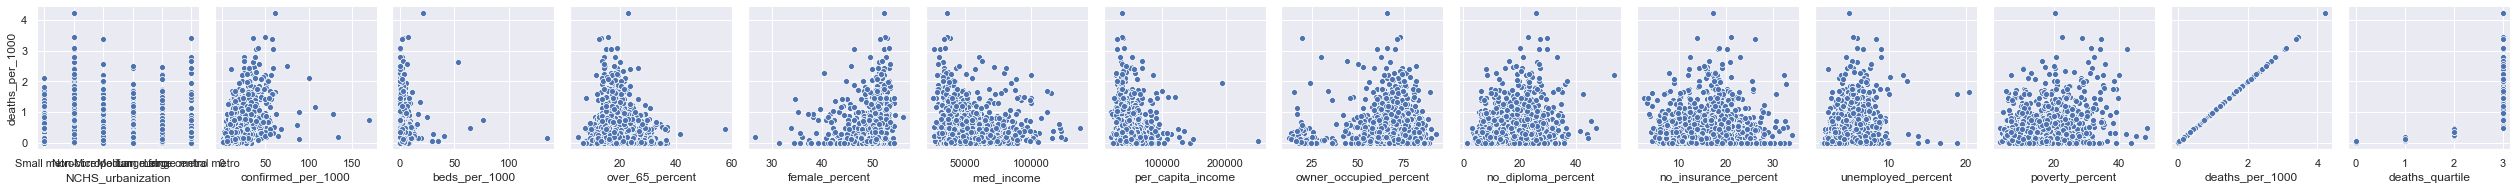

In [36]:
# just looking at row with "deaths_per_1000"
g2 = sns.pairplot(X_train_deaths_data, x_vars = X_train_deaths_data.columns, y_vars=["deaths_per_1000"]) 
g2

* Based on the plots observing deaths per 1000, one can see that: 
* Deaths per 1000 appears to have a strong positive correlation with confirmed per 1000. This makes sense since one must have the infection before dying of it.
* There appears to be a positive correlation between Covid deaths per 1000 and education levels. There also appears to be a correlation between covid deaths per 1000 and lacking health insurance. Finally, the data also suggests a positive correlation between the percentage of females in a county and the Covid deaths per 1000. However, this may be because of the few outliers of places that are abundantly male (and happen to have low Covid death rates). 
* There appears to be a negative correlation between income (both median household and per-capita) and covid death (lower income counties seem to have higher rates of Covid death). There may be a minor negative correlation between beds per 1000 and Covid death rate (more beds per 1000 is associated with more Covid deaths per 1000).

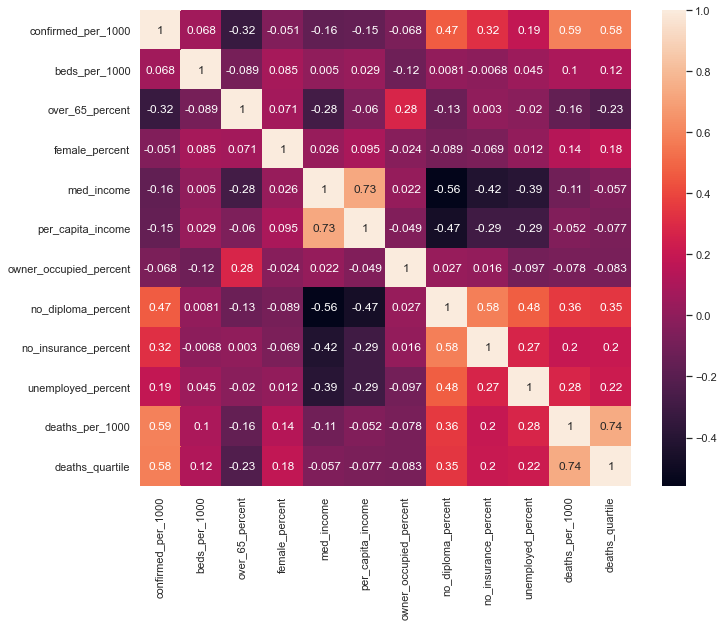

In [37]:
# Display the correlation matrrix
X_train_deaths_corr =X_train_deaths_data.corr() 
sns.heatmap(X_train_deaths_corr, annot=True)

* Confirmed Cases and Deaths per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


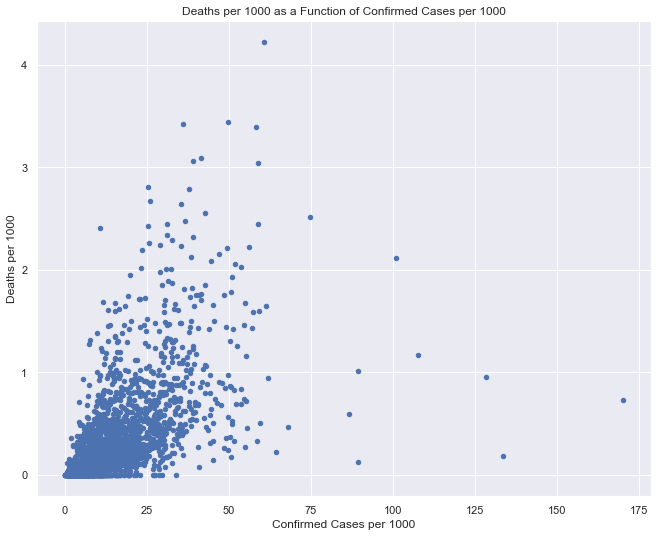

In [38]:
ax6_train = X_train_deaths_data.plot('confirmed_per_1000', 'deaths_per_1000', 'scatter')
ax6_train.set(xlabel='Confirmed Cases per 1000', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Confirmed Cases per 1000')
plt.show()

With a correlation coefficient of 0.59 this demonstrates that across counties in the US, there is a strong positive correlation between confirmed cases per 1000 and Covid deaths per 1000. 

* Education and Deaths per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


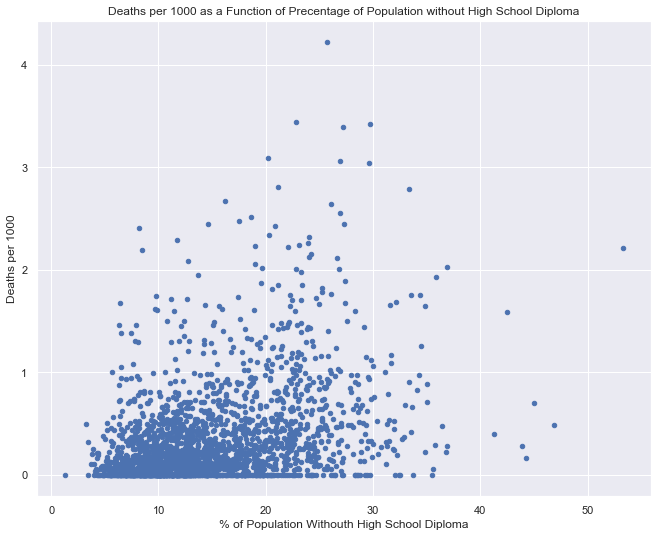

In [39]:
ax7_train = X_train_deaths_data.plot('no_diploma_percent', 'deaths_per_1000', 'scatter')
ax7_train.set(xlabel='% of Population Withouth High School Diploma', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Precentage of Population without High School Diploma')
plt.show()

With a correlation coefficient of 0.36, this demonstrates that across counties in the US, there is a slight positive correlation between % without a high school diploma and Covid deaths per 1000. 

* Insurance and Deaths per 1000: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


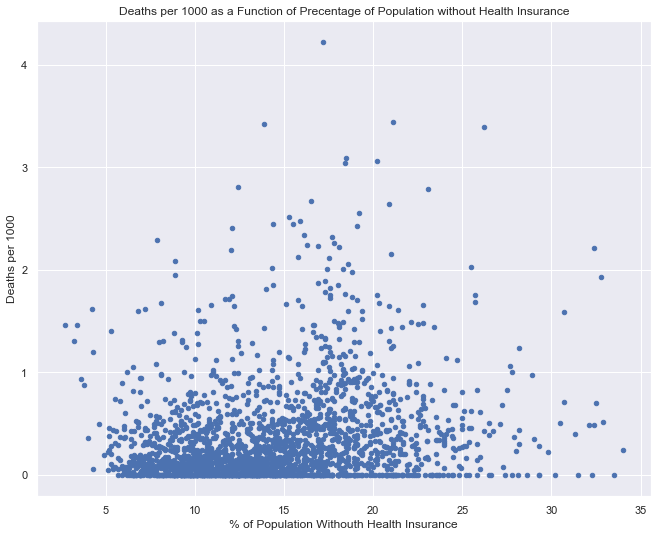

In [40]:
# Make a Scatter Plot of the data 
ax8_train = X_train_cases_data.plot('no_insurance_percent', 'deaths_per_1000', 'scatter')
ax8_train.set(xlabel='% of Population Withouth Health Insurance', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Precentage of Population without Health Insurance')
plt.show()

With a correlation coefficient of 0.20 this demonstrates that across counties in the US, there is a slight positive correlation between % lacking health insurance and Covid deaths per 1000. 

* Median Household Income and Deaths per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


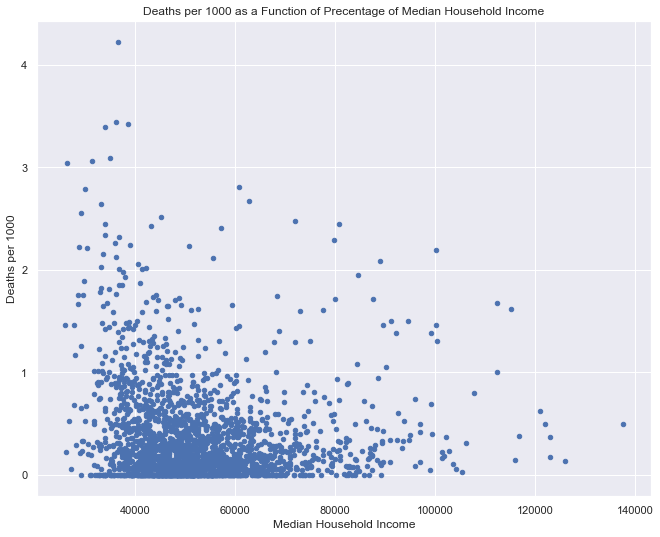

In [41]:
# Make a Scatter Plot of the data 
ax9_train = X_train_cases_data.plot('med_income', 'deaths_per_1000', 'scatter')
ax9_train.set(xlabel='Median Household Income', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Precentage of Median Household Income')
plt.show()

With a correlation coefficient of -0.11 this demonstrates that across counties in the US, there is a minor negative correlation between median household income and Covid deaths per 1000. 

* % Over 65 and Deaths per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


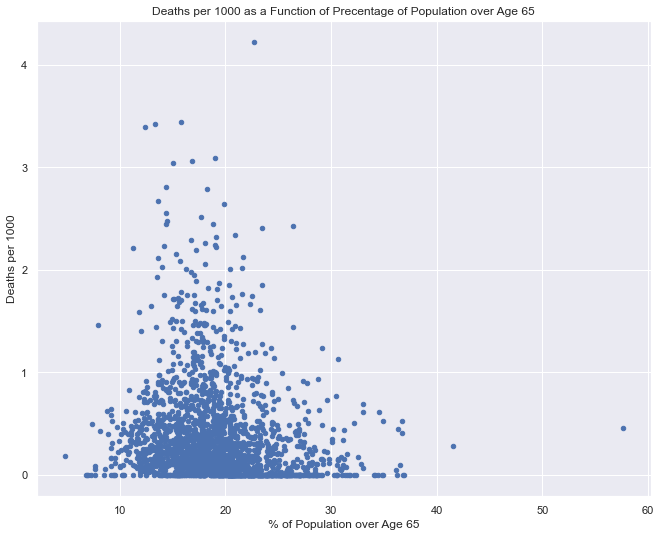

In [42]:
# Make a Scatter Plot of the data 
ax10_train = X_train_cases_data.plot('over_65_percent', 'deaths_per_1000', 'scatter')
ax10_train.set(xlabel='% of Population over Age 65', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Precentage of Population over Age 65')
plt.show()

With a correlation coefficient of -0.16 this demonstrates that across counties in the US, there is a slight negative correlation between having an older population and Covid rates per 1000. As with the cases data, this is again surprising, as one would expect that having an older population would relate to have higher rates of Covid deaths cases. However, the data shows that this is not necessarily the case. 

* Beds and Deaths per 1000:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


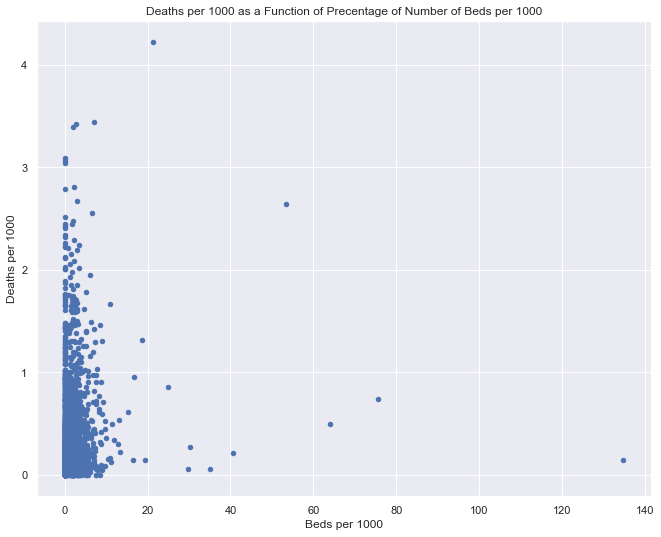

In [43]:
# Make a Scatter Plot of the data 
ax11_train = X_train_cases_data.plot('beds_per_1000', 'deaths_per_1000', 'scatter')
ax11_train.set(xlabel='Beds per 1000', 
              ylabel='Deaths per 1000', 
              title='Deaths per 1000 as a Function of Precentage of Number of Beds per 1000')
plt.show()

With a correlation coefficient of 0.10 this demonstrates that across counties in the US, there is a minor negative correlation between number of beds per 1000 and Covid deaths per 1000. 

* NCHS Classification and Average Number of Deaths per 1000:

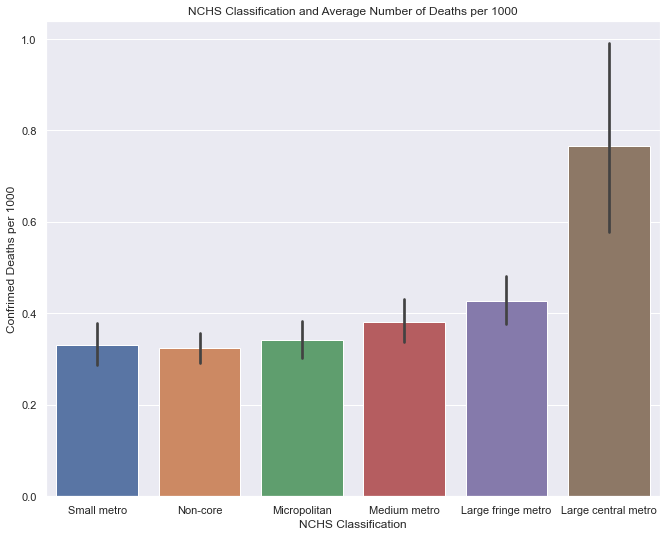

In [44]:
# Make a Scatter Plot of the data 
ax5_train = sns.barplot('NCHS_urbanization', 'deaths_per_1000', data=X_train_deaths_data)
ax5_train.set(xlabel='NCHS Classification', 
              ylabel='Confrimed Deaths per 1000', 
              title='NCHS Classification and Average Number of Deaths per 1000')
plt.show()

Large central metro regions have significantly more Covid deaths compared to all other regions.

<b> Now that I have a better idea of the features within my dataset, I will now create some models and utilize the most accurate one (based on predicting quartiles) for further analysis. In order to make classifications, I will use confirmed_quartile or deaths_quartile. </b>

## IV. Modeling

<b> A. First I will work with the confirmed cases. </b>

In [45]:
# Handle text with label encoder
# source: 
#https://discuss.analyticsvidhya.com/t/error-could-not-convert-string-to-float-while-running-randomforest-model-in-python/4855/2

from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    data['NCHS_urbanization'] = number.fit_transform(data.NCHS_urbanization)
    data=data.fillna(-999)
    return data

X_train_cases_no_text = convert(X_train_cases)
X_test_cases_no_text =convert(X_test_cases)
X_train_cases_no_text

<ipython-input-45-904b48897d13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NCHS_urbanization'] = number.fit_transform(data.NCHS_urbanization)


NCHS_urbanization  deaths_per_1000  beds_per_1000  over_65_percent  \
169                   5         0.264607       1.135985              9.2   
1490                  4         0.000000       0.000000             25.0   
2551                  3         0.148599       0.000000             26.8   
305                   2         0.924055       2.205731             17.2   
15                    4         0.892201       0.000000             20.4   
...                 ...              ...            ...              ...   
1700                  4         0.738098       0.000000             21.7   
333                   1         0.045355       1.670585             21.2   
1296                  1         0.139110       2.724243             15.9   
1107                  1         0.432626       1.571874             14.8   
1948                  3         0.337648       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

      poverty_percent  confirmed_per_1000  
169              24.9           24.448773  
1490             15.1            0.000000  
2551             16.9           11.219258  
305              13.1           15.149697  
15               30.0           21.622756  
...               ...                 ...  
1700             13.1           13.654816  
333              17.5            5.404833  
1296             10.6           14.455876  
1107             10.3           28.711929  
1948             12.9           10.804727  

[2173 rows x 13 columns]

In [46]:
# Drop variables not part of model, I will not include 'confirmed_per_1000' in the model 

# Also leave confirmed_per_1000 from df, not part of model 
X_train_cases_no_text = X_train_cases_no_text.drop(columns=['confirmed_per_1000'])
X_train_cases_no_text

X_test_cases_no_text = X_test_cases_no_text.drop(columns=['confirmed_per_1000'])
X_train_cases_no_text

NCHS_urbanization  deaths_per_1000  beds_per_1000  over_65_percent  \
169                   5         0.264607       1.135985              9.2   
1490                  4         0.000000       0.000000             25.0   
2551                  3         0.148599       0.000000             26.8   
305                   2         0.924055       2.205731             17.2   
15                    4         0.892201       0.000000             20.4   
...                 ...              ...            ...              ...   
1700                  4         0.738098       0.000000             21.7   
333                   1         0.045355       1.670585             21.2   
1296                  1         0.139110       2.724243             15.9   
1107                  1         0.432626       1.571874             14.8   
1948                  3         0.337648       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

      poverty_percent  
169              24.9  
1490             15.1  
2551             16.9  
305              13.1  
15               30.0  
...               ...  
1700             13.1  
333              17.5  
1296             10.6  
1107             10.3  
1948             12.9  

[2173 rows x 12 columns]

<b> i. Decision Tree </b>

Make the model

In [47]:
# Make Classification Model Using Decision Tree

# source: https://scikit-learn.org/stable/modules/tree.html

from sklearn import tree

# split done earlier
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11) 


tree_cases = tree.DecisionTreeClassifier(max_depth=6) 

#Training the machine with our model
tree_cases_model = tree_cases.fit(X_train_cases_no_text, Y_train_cases)

# Make predictions on training set 
tree_cases_predictions_train = tree_cases_model.predict(X_train_cases_no_text)

# Make predictions on test set 
tree_cases_predictions_test = tree_cases_model.predict(X_test_cases_no_text)

Assess Quality of Model (Accuracy) via Confusion Matrix and Classification Report

* I define accuracy as the rate at which the classifier predicts a label (quartile) which matches the actual label (quartile) of the county.

Text(66.5, 0.5, 'Predicted Cases Quartile')

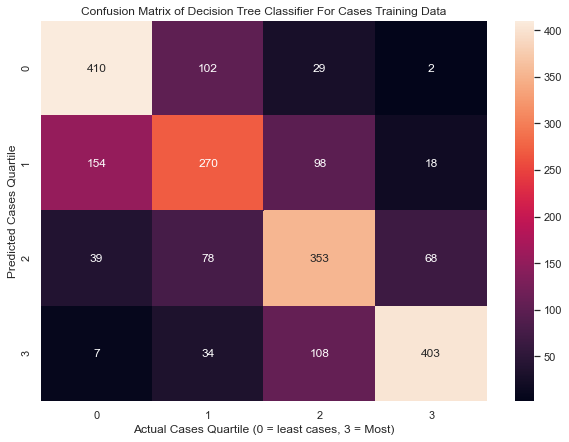

In [48]:
# Confusion matries and Accuracy
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix

# Confusion Matrix
# source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
cm_cases_tree_train = metrics.confusion_matrix(Y_train_cases,tree_cases_predictions_train)
#print(cm)


df_cm_cases_tree_train = pd.DataFrame(cm_cases_tree_train, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_cases_tree_train, annot=True, fmt='g')
plt.title('Confusion Matrix of Decision Tree Classifier For Cases Training Data')
plt.xlabel('Actual Cases Quartile (0 = least cases, 3 = Most)')
plt.ylabel('Predicted Cases Quartile')

In [49]:
# Analyze classifications using a classification report  
# source: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31

from sklearn.metrics import classification_report
dt_cases_classification_report_train = classification_report(Y_train_cases,tree_cases_predictions_train)
print(dt_cases_classification_report_train)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       543
           1       0.56      0.50      0.53       540
           2       0.60      0.66      0.63       538
           3       0.82      0.73      0.77       552

    accuracy                           0.66      2173
   macro avg       0.66      0.66      0.66      2173
weighted avg       0.66      0.66      0.66      2173



Text(66.5, 0.5, 'Predicted Cases Quartile')

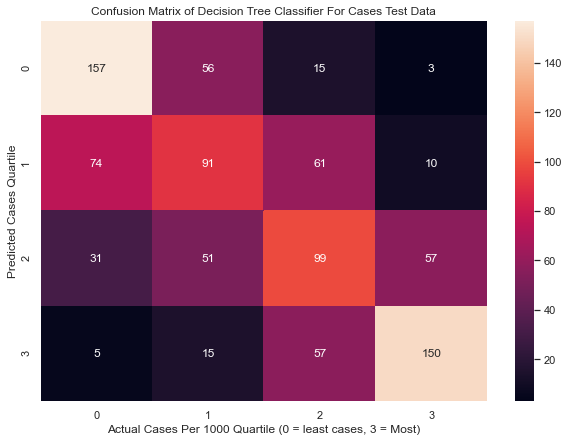

In [50]:
# Confusion Matrix For Test Data
cm_cases_tree_test = metrics.confusion_matrix(Y_test_cases,tree_cases_predictions_test)
#print(cm)


df_cm_cases_tree_test = pd.DataFrame(cm_cases_tree_test, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_cases_tree_test, annot=True, fmt='g')
plt.title('Confusion Matrix of Decision Tree Classifier For Cases Test Data')
plt.xlabel('Actual Cases Per 1000 Quartile (0 = least cases, 3 = Most)')
plt.ylabel('Predicted Cases Quartile')

In [51]:
# Analyze classifications using a classification report  

dt_cases_classification_report_test = classification_report(Y_test_cases,tree_cases_predictions_test)
print(dt_cases_classification_report_test)

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       231
           1       0.43      0.39      0.41       236
           2       0.43      0.42      0.42       238
           3       0.68      0.66      0.67       227

    accuracy                           0.53       932
   macro avg       0.53      0.54      0.53       932
weighted avg       0.53      0.53      0.53       932



Observe Feature Importance

Feature: 0, Score: 0.00571
Feature: 1, Score: 0.49383
Feature: 2, Score: 0.01398
Feature: 3, Score: 0.12654
Feature: 4, Score: 0.03321
Feature: 5, Score: 0.01819
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02799
Feature: 8, Score: 0.07648
Feature: 9, Score: 0.15011
Feature: 10, Score: 0.05396
Feature: 11, Score: 0.00000


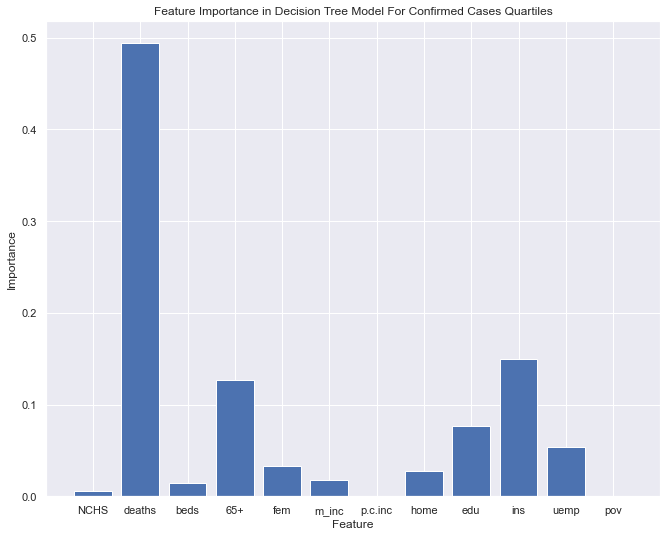

In [52]:
importance_Tree_select = tree_cases.feature_importances_

# Create labels
select_feature_names = ['NCHS', 'deaths', 'beds',
                       '65+', 'fem', 'm_inc', 'p.c.inc',
                       'home', 'edu', 'ins',
                       'uemp', 'pov']
       
# Summarize Importance of Features
for i,v in enumerate(importance_Tree_select):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot Feature Importance
plt.bar(select_feature_names, importance_Tree_select)
plt.title('Feature Importance in Decision Tree Model For Confirmed Cases Quartiles')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

This model emphasizes deaths per 1000, percentage of population over 65, lack of health insurance, education, and unemployment. 


<b> ii. Random Forest</b>

Make the model

In [53]:
# Make Classification Model Using Random Forest

from sklearn.ensemble import RandomForestClassifier

# Random forest will have 15 trees 
rf_cases = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=0) 


#Training the machine with our model
rf_cases_model = rf_cases.fit(X_train_cases_no_text, Y_train_cases)

# Make predictions on training set 
rf_cases_predictions_train = rf_cases_model.predict(X_train_cases_no_text)

# Make predictions on test set 
rf_cases_predictions_test = rf_cases_model.predict(X_test_cases_no_text)

Assess Quality of Model (Accuracy) via Confusion Matrix and Classification Report

Text(66.5, 0.5, 'Predicted Cases Quartile')

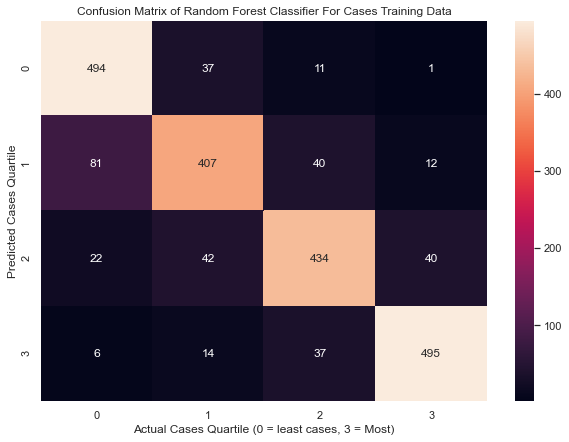

In [54]:
# Confusion Matrix
cm_cases_rf_train = metrics.confusion_matrix(Y_train_cases, rf_cases_predictions_train)

df_cm_cases_rf_train = pd.DataFrame(cm_cases_rf_train, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_cases_rf_train, annot=True, fmt='g')
plt.title('Confusion Matrix of Random Forest Classifier For Cases Training Data')
plt.xlabel('Actual Cases Quartile (0 = least cases, 3 = Most)')
plt.ylabel('Predicted Cases Quartile')

In [55]:
# Analyze classifications using a classification report  

rf_cases_classification_report_train = classification_report(Y_train_cases, rf_cases_predictions_train)
print(rf_cases_classification_report_train)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       543
           1       0.81      0.75      0.78       540
           2       0.83      0.81      0.82       538
           3       0.90      0.90      0.90       552

    accuracy                           0.84      2173
   macro avg       0.84      0.84      0.84      2173
weighted avg       0.84      0.84      0.84      2173



Text(66.5, 0.5, 'Predicted Cases Quartile')

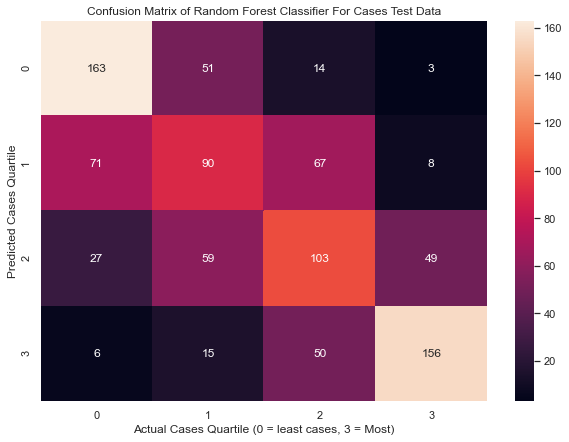

In [56]:
# Confusion Matrix For Test Data
cm_cases_rf_test = metrics.confusion_matrix(Y_test_cases, rf_cases_predictions_test)


df_cm_cases_rf_test = pd.DataFrame(cm_cases_rf_test, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_cases_rf_test, annot=True, fmt='g')
plt.title('Confusion Matrix of Random Forest Classifier For Cases Test Data')
plt.xlabel('Actual Cases Quartile (0 = least cases, 3 = Most)')
plt.ylabel('Predicted Cases Quartile')

In [57]:
# Analyze classifications using a classification report  

rf_cases_classification_report_test = classification_report(Y_test_cases, rf_cases_predictions_test)
print(rf_cases_classification_report_test)

              precision    recall  f1-score   support

           0       0.61      0.71      0.65       231
           1       0.42      0.38      0.40       236
           2       0.44      0.43      0.44       238
           3       0.72      0.69      0.70       227

    accuracy                           0.55       932
   macro avg       0.55      0.55      0.55       932
weighted avg       0.55      0.55      0.55       932



Observe Feature Importance

Feature: 0, Score: 0.02394
Feature: 1, Score: 0.26140
Feature: 2, Score: 0.03314
Feature: 3, Score: 0.11387
Feature: 4, Score: 0.07284
Feature: 5, Score: 0.04367
Feature: 6, Score: 0.04503
Feature: 7, Score: 0.05693
Feature: 8, Score: 0.11183
Feature: 9, Score: 0.11918
Feature: 10, Score: 0.05289
Feature: 11, Score: 0.06529


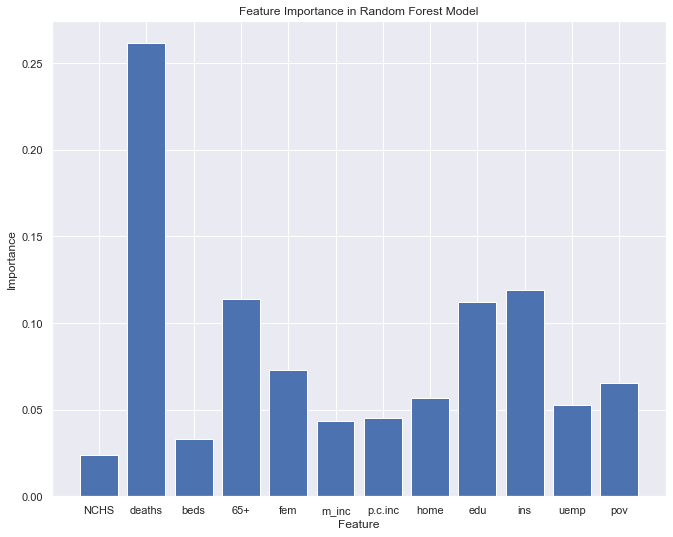

In [59]:
# Feature importance with Random Forest
importance_RF_cases = rf_cases.feature_importances_

       
# Summarize Importance of Features
for i,v in enumerate(importance_RF_cases):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot Feature Importance
plt.bar(select_feature_names, importance_RF_cases)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
    

This model emphasizes deaths per 1000, lack of health insurance, and education, and percentage of population above age 65. 


<b> iiv. Comparing Models</b>

When looking at the 2 (decision trees and random forest), it is evident that the the training set has better accuracy (in predicting the prevalence of confirmed cases per county) compared to the test set. However, accuracies for the test set were relativley high when observing the top and bottom quartiles. For this reason, my analysis will consider the top and bottom quartiles when looking at Covid outcome disparities. 

It is also clear that in addition to covid deaths, features such as % of people over age 65 (negativley correlated), % of people without a high school diploma (positivley correlated), and % of people without health insurance (positivley correlated) are important when examining prevalence of confirmed Covid cases.

<b> B. Now I will look at death rates. </b>

In [60]:
# Handle text with label encoder
X_train_deaths_no_text = convert(X_train_deaths)
X_test_deaths_no_text = convert(X_test_deaths)
X_train_deaths_no_text

<ipython-input-45-904b48897d13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NCHS_urbanization'] = number.fit_transform(data.NCHS_urbanization)


NCHS_urbanization  confirmed_per_1000  beds_per_1000  over_65_percent  \
169                   5           24.448773       1.135985              9.2   
1490                  4            0.000000       0.000000             25.0   
2551                  3           11.219258       0.000000             26.8   
305                   2           15.149697       2.205731             17.2   
15                    4           21.622756       0.000000             20.4   
...                 ...                 ...            ...              ...   
1700                  4           13.654816       0.000000             21.7   
333                   1            5.404833       1.670585             21.2   
1296                  1           14.455876       2.724243             15.9   
1107                  1           28.711929       1.571874             14.8   
1948                  3           10.804727       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

      poverty_percent  deaths_per_1000  
169              24.9         0.264607  
1490             15.1         0.000000  
2551             16.9         0.148599  
305              13.1         0.924055  
15               30.0         0.892201  
...               ...              ...  
1700             13.1         0.738098  
333              17.5         0.045355  
1296             10.6         0.139110  
1107             10.3         0.432626  
1948             12.9         0.337648  

[2173 rows x 13 columns]

In [61]:
# Drop variables not part of model, I will not include 'deaths_per_1000' in the model 

# Also leave confirmed_per_1000 from df, not part of model 
X_train_deaths_no_text = X_train_deaths_no_text.drop(columns=['deaths_per_1000'])
X_train_deaths_no_text

X_test_deaths_no_text = X_test_deaths_no_text.drop(columns=['deaths_per_1000'])
X_train_deaths_no_text

NCHS_urbanization  confirmed_per_1000  beds_per_1000  over_65_percent  \
169                   5           24.448773       1.135985              9.2   
1490                  4            0.000000       0.000000             25.0   
2551                  3           11.219258       0.000000             26.8   
305                   2           15.149697       2.205731             17.2   
15                    4           21.622756       0.000000             20.4   
...                 ...                 ...            ...              ...   
1700                  4           13.654816       0.000000             21.7   
333                   1            5.404833       1.670585             21.2   
1296                  1           14.455876       2.724243             15.9   
1107                  1           28.711929       1.571874             14.8   
1948                  3           10.804727       0.000000             17.9   

      female_percent  med_income  per_capita_income  owner_occupied_percent  \
169             49.5     50113.0              39216                    46.2   
1490            45.6     41009.0              35772                    67.4   
2551            51.9     48337.0              40781                    74.1   
305             50.8     62519.0              49945                    71.7   
15              54.5     32495.0              32919                    65.7   
...              ...         ...                ...                     ...   
1700            49.4     55190.0              48184                    76.8   
333             50.5     50381.0              42649                    73.9   
1296            50.8     60044.0              50065                    71.9   
1107            50.6     66006.0              42104                    75.0   
1948            50.5     54830.0              36921                    82.9   

      no_diploma_percent  no_insurance_percent  unemployed_percent  \
169              14.6652                  19.5                 3.0   
1490              3.4483                  18.1                 3.0   
2551             16.0729                  15.4                 5.4   
305              15.4797                  11.7                 4.9   
15               18.6851                  13.0                 5.4   
...                  ...                   ...                 ...   
1700             10.8868                  16.9                 4.3   
333              13.8669                  10.6                 6.9   
1296             13.0615                  14.7                 4.0   
1107             14.1382                  13.9                 2.8   
1948             13.7301                  12.5                 2.9   

      poverty_percent  
169              24.9  
1490             15.1  
2551             16.9  
305              13.1  
15               30.0  
...               ...  
1700             13.1  
333              17.5  
1296             10.6  
1107             10.3  
1948             12.9  

[2173 rows x 12 columns]

<b> i. Decision Tree </b>

Make the model

In [62]:
# Make Classification Model Using Decision Tree

tree_deaths = tree.DecisionTreeClassifier(max_depth=6) 

#Training the machine with our model
tree_deaths_model = tree_deaths.fit(X_train_deaths_no_text, Y_train_deaths)

# Make predictions on training set 
tree_deaths_predictions_train = tree_deaths_model.predict(X_train_deaths_no_text)

# Make predictions on test set 
tree_deaths_predictions_test = tree_deaths_model.predict(X_test_deaths_no_text)

Assess Quality of Model (Accuracy) via Confusion Matrix and Classification Report

Text(66.5, 0.5, 'Predicted deaths Quartile')

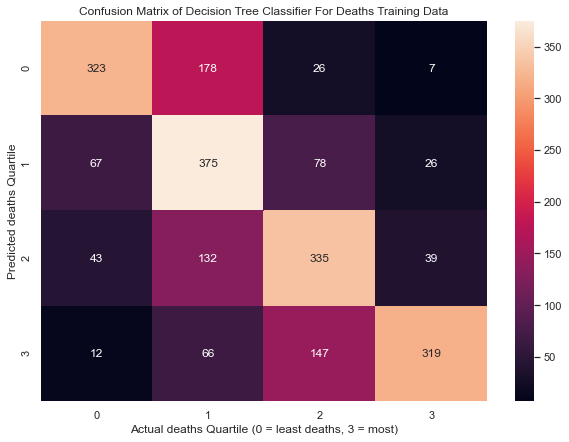

In [63]:
# Confusion matrices and Accuracy
cm_deaths_tree_train = metrics.confusion_matrix(Y_train_deaths,tree_deaths_predictions_train)


df_cm_deaths_tree_train = pd.DataFrame(cm_deaths_tree_train, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_deaths_tree_train, annot=True, fmt='g')
plt.title('Confusion Matrix of Decision Tree Classifier For Deaths Training Data')
plt.xlabel('Actual deaths Quartile (0 = least deaths, 3 = most)')
plt.ylabel('Predicted deaths Quartile')

In [64]:
# Analyze classifications using a classification report  

dt_deaths_classification_report_train = classification_report(Y_train_deaths,tree_deaths_predictions_train)
print(dt_deaths_classification_report_train)

              precision    recall  f1-score   support

           0       0.73      0.60      0.66       534
           1       0.50      0.69      0.58       546
           2       0.57      0.61      0.59       549
           3       0.82      0.59      0.68       544

    accuracy                           0.62      2173
   macro avg       0.65      0.62      0.63      2173
weighted avg       0.65      0.62      0.63      2173



Text(66.5, 0.5, 'Predicted Deaths Quartile')

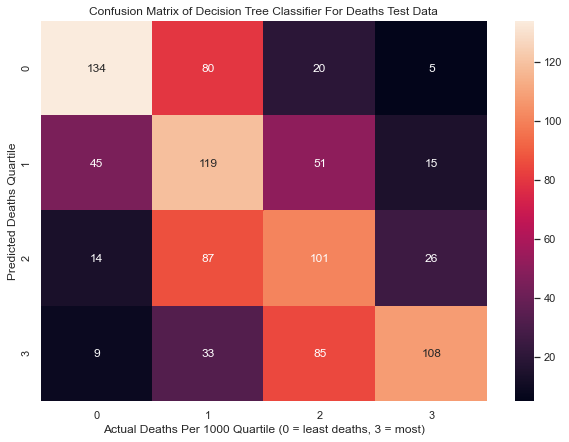

In [65]:
# Confusion Matrix For Test Data
cm_deaths_tree_test = metrics.confusion_matrix(Y_test_deaths,tree_deaths_predictions_test)


df_cm_deaths_tree_test = pd.DataFrame(cm_deaths_tree_test, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_deaths_tree_test, annot=True, fmt='g')
plt.title('Confusion Matrix of Decision Tree Classifier For Deaths Test Data')
plt.xlabel('Actual Deaths Per 1000 Quartile (0 = least deaths, 3 = most)')
plt.ylabel('Predicted Deaths Quartile')

In [66]:
# Analyze classifications using a classification report  

dt_deaths_classification_report_test = classification_report(Y_test_deaths,tree_deaths_predictions_test)
print(dt_deaths_classification_report_test)

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       239
           1       0.37      0.52      0.43       230
           2       0.39      0.44      0.42       228
           3       0.70      0.46      0.56       235

    accuracy                           0.50       932
   macro avg       0.53      0.50      0.50       932
weighted avg       0.54      0.50      0.50       932



Observe Feature Importance

Feature: 0, Score: 0.01599
Feature: 1, Score: 0.60991
Feature: 2, Score: 0.03732
Feature: 3, Score: 0.03591
Feature: 4, Score: 0.06190
Feature: 5, Score: 0.02760
Feature: 6, Score: 0.02199
Feature: 7, Score: 0.01143
Feature: 8, Score: 0.01177
Feature: 9, Score: 0.07336
Feature: 10, Score: 0.07568
Feature: 11, Score: 0.01713


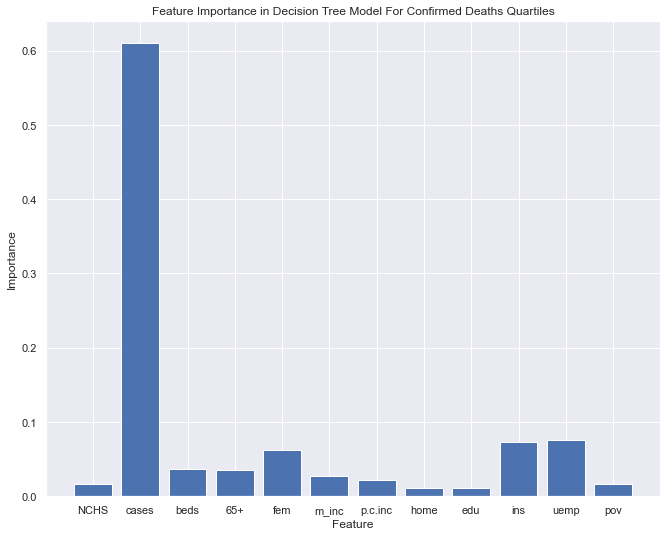

In [67]:
importance_Tree_select_2 = tree_deaths.feature_importances_

# Create labels
select_feature_names_2 = ['NCHS', 'cases', 'beds',
                       '65+', 'fem', 'm_inc', 'p.c.inc',
                       'home', 'edu', 'ins',
                       'uemp', 'pov']
       
# Summarize Importance of Features
for i,v in enumerate(importance_Tree_select_2):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot Feature Importance
plt.bar(select_feature_names_2, importance_Tree_select_2)
plt.title('Feature Importance in Decision Tree Model For Confirmed Deaths Quartiles')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

This model emphasizes cases per 1000, lack of health insurance, and unemployment rate. 


<b> ii. Random Forest</b>

Make the model

In [68]:
# Make Classification Model Using Random Forest

# Random forest will have 15 trees 
rf_deaths = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=0) 


#Training the machine with our model
rf_deaths_model = rf_deaths.fit(X_train_deaths_no_text, Y_train_deaths)

# Make predictions on training set 
rf_deaths_predictions_train = rf_deaths_model.predict(X_train_deaths_no_text)

# Make predictions on test set 
rf_deaths_predictions_test = rf_deaths_model.predict(X_test_deaths_no_text)

Assess Quality of Model (Accuracy) via Confusion Matrix and Classification Report

Text(66.5, 0.5, 'Predicted Deaths Quartile')

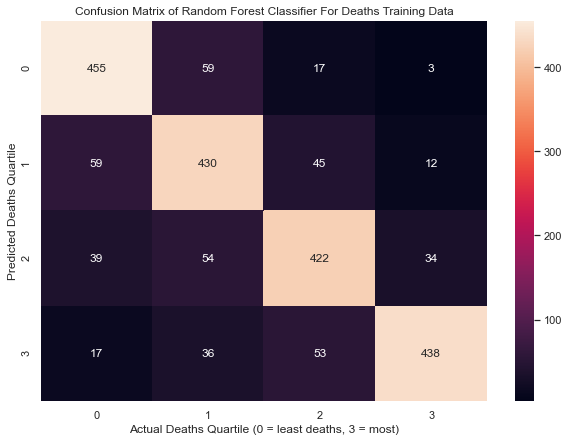

In [69]:
# Confusion Matrix
cm_deaths_rf_train = metrics.confusion_matrix(Y_train_deaths, rf_deaths_predictions_train)

df_cm_deaths_rf_train = pd.DataFrame(cm_deaths_rf_train, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_deaths_rf_train, annot=True, fmt='g')
plt.title('Confusion Matrix of Random Forest Classifier For Deaths Training Data')
plt.xlabel('Actual Deaths Quartile (0 = least deaths, 3 = most)')
plt.ylabel('Predicted Deaths Quartile')

In [70]:
# Analyze classifications using a classification report  

rf_deaths_classification_report_train = classification_report(Y_train_deaths, rf_deaths_predictions_train)
print(rf_deaths_classification_report_train)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       534
           1       0.74      0.79      0.76       546
           2       0.79      0.77      0.78       549
           3       0.90      0.81      0.85       544

    accuracy                           0.80      2173
   macro avg       0.81      0.80      0.80      2173
weighted avg       0.81      0.80      0.80      2173



Text(66.5, 0.5, 'Predicted Deaths Quartile')

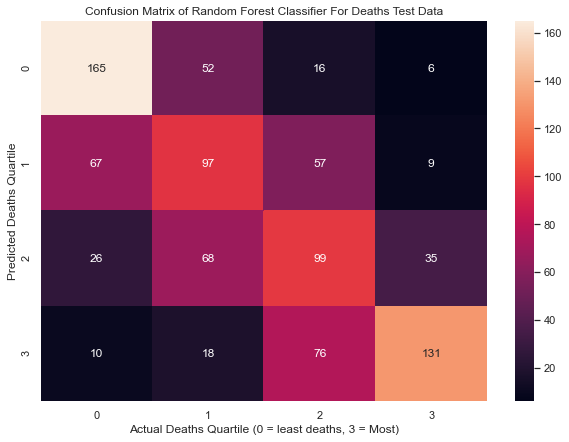

In [71]:
# Confusion Matrix For Test Data
cm_deaths_rf_test = metrics.confusion_matrix(Y_test_deaths, rf_deaths_predictions_test)


df_cm_deaths_rf_test = pd.DataFrame(cm_deaths_rf_test, index = [i for i in "0123"],
                  columns = [i for i in "0123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_deaths_rf_test, annot=True, fmt='g')
plt.title('Confusion Matrix of Random Forest Classifier For Deaths Test Data')
plt.xlabel('Actual Deaths Quartile (0 = least deaths, 3 = Most)')
plt.ylabel('Predicted Deaths Quartile')

In [72]:
# Analyze classifications using a classification report  

rf_deaths_classification_report_test = classification_report(Y_test_deaths, rf_deaths_predictions_test)
print(rf_deaths_classification_report_test)

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       239
           1       0.41      0.42      0.42       230
           2       0.40      0.43      0.42       228
           3       0.72      0.56      0.63       235

    accuracy                           0.53       932
   macro avg       0.54      0.53      0.53       932
weighted avg       0.54      0.53      0.53       932



Observe Feature Importance

Feature: 0, Score: 0.02552
Feature: 1, Score: 0.31793
Feature: 2, Score: 0.05426
Feature: 3, Score: 0.07165
Feature: 4, Score: 0.08163
Feature: 5, Score: 0.05451
Feature: 6, Score: 0.05566
Feature: 7, Score: 0.04519
Feature: 8, Score: 0.08545
Feature: 9, Score: 0.07043
Feature: 10, Score: 0.06690
Feature: 11, Score: 0.07087


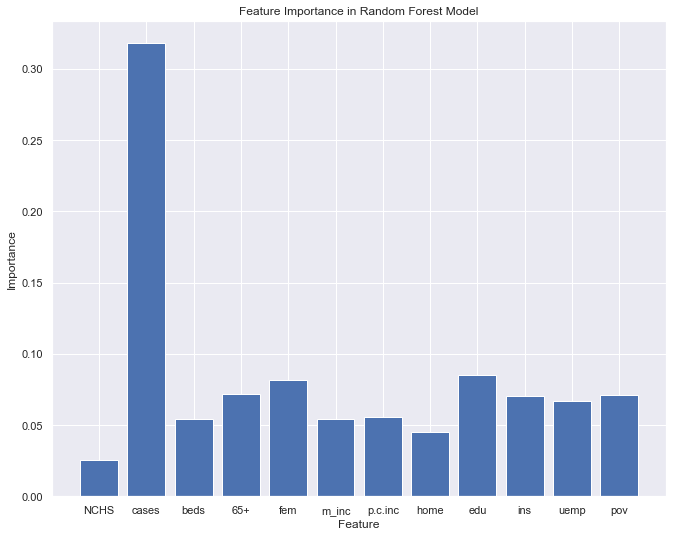

In [73]:
# Feature importance with Random Forest
importance_RF_deaths_2 = rf_deaths.feature_importances_

       
# Summarize Importance of Features
for i,v in enumerate(importance_RF_deaths_2):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot Feature Importance
plt.bar(select_feature_names_2, importance_RF_deaths_2)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

This model emphasizes cases per 1000, % of population without a high school diploma, and percentage of population that is female. 


<b> iiv. Comparing Models</b>

When looking at the 2 models, (decision trees and random forest), it is evident that the the training set has better accuracy (in predicting the prevalence of Covid deaths per county) compared to the test set (in some cases, the test set was just above chance when classifying counties into the appropriate quartiles). However, accuracies for the test set were relatively high when observing the top and bottom quartiles (above 60% with all models). For this reason, my analysis will consider the top and bottom quartiles when looking at Covid deaths disparities. 

It is also clear that in addition to Covid cases, features such as % of people over age 65 (negatively correlated), % of people without a high school diploma (positively correlated), % of people without health insurance (positively correlated), and % of people unemployed (positively correlated) are important when examining prevalence of Covid deaths.

The random forest model had the best test accuracy for both confirmed cases quartile and deaths quartile, this model is good because it provides close predictions in the top and fourth quartiles and also gives features which help to explain the differences we are seeing between the covid cases and death across the quartiles. Such features include % of people without a high school diploma (positively correlated with higher incidence of Covid cases and death) and % of people without health insurance (also positively correlated with higher incidence of Covid cases and death).

## V.  Analysis

Based on the random forest classifiers modeling confirmed Covid cases and deaths it is evident that features such % of people over age 65, % of people without a high school diploma, % of people without health insurance, and % of people living below the poverty line are the primary drivers of the differences within the data. For this reason, I will now look at the average values of these features between the top and bottom quartiles of confrimed cases and deaths. 

<b> Pull top and bottom Quartile for cases and deaths </b>

In [74]:
top_quartile_cases = select_counties.loc[select_counties['confirmed_quartile'] == 0]
bottom_quartile_cases = select_counties.loc[select_counties['confirmed_quartile'] == 3]

top_quartile_deaths = select_counties.loc[select_counties['deaths_quartile'] == 0]
bottom_quartile_deaths = select_counties.loc[select_counties['deaths_quartile'] == 3]

<b> Looking at Averages Across Quartiles: % of Population over 65 </b>

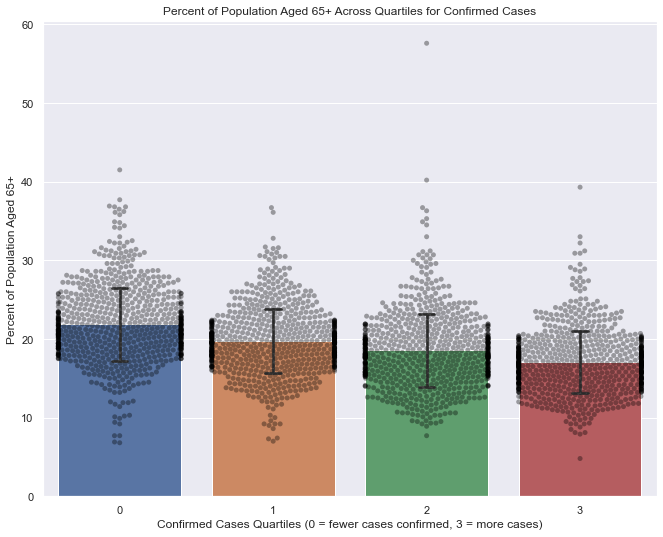

In [75]:
# Cases Quartiles and % over 65

# source: https://stackoverflow.com/questions/51027717/pyplot-bar-charts-with-individual-data-points/51032760

fig1a = sns.barplot(x="confirmed_quartile", y="over_65_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="confirmed_quartile", y="over_65_percent", data=select_counties, color="0", alpha=.35)
fig1a.set(xlabel='Confirmed Cases Quartiles (0 = fewer cases confirmed, 3 = more cases)', 
              ylabel='Percent of Population Aged 65+', 
              title='Percent of Population Aged 65+ Across Quartiles for Confirmed Cases')
plt.show()

In [76]:
# Calculate means and standard deviations for top and bottom quartile 
# https://stackoverflow.com/questions/40074739/how-to-get-mean-of-rows-selected-with-another-columns-values-in-pandas

over_65_cases_0_mean = select_counties.loc[select_counties['confirmed_quartile'] == 0, 'over_65_percent'].mean()
over_65_cases_3_mean = select_counties.loc[select_counties['confirmed_quartile'] == 3, 'over_65_percent'].mean()


over_65_cases_0_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 0, 'over_65_percent'])
over_65_cases_3_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 3, 'over_65_percent'])

print("The mean percentage of elderly in the bottom quartile (lowest Covid Cases) of Covid case rates is: ", 
      over_65_cases_0_mean, 
      "+/-", 
     over_65_cases_0_stdev)

print("The mean percentage of elderly in the top quartile (highest Covid Cases) of Covid case rates is: ", 
      over_65_cases_3_mean, 
      "+/-", 
     over_65_cases_3_stdev)

The mean percentage of elderly in the bottom quartile (lowest Covid Cases) of Covid case rates is:  21.84005167958655 +/- 4.692307210447998
The mean percentage of elderly in the top quartile (highest Covid Cases) of Covid case rates is:  17.073427471116815 +/- 3.8951885072824055


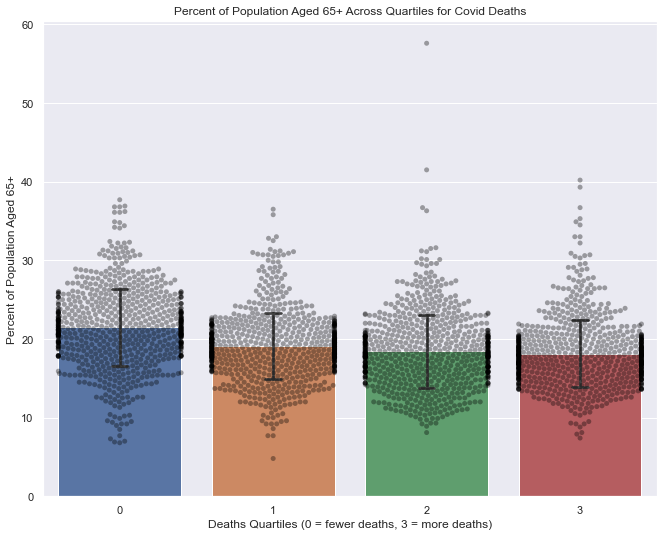

In [77]:
# Deaths Quartiles and % over 65

fig1b = sns.barplot(x="deaths_quartile", y="over_65_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="deaths_quartile", y="over_65_percent", data=select_counties, color="0", alpha=.35)
fig1b.set(xlabel='Deaths Quartiles (0 = fewer deaths, 3 = more deaths)', 
              ylabel='Percent of Population Aged 65+', 
          title='Percent of Population Aged 65+ Across Quartiles for Covid Deaths')
plt.show()

In [78]:
# Calculate means and standard deviations for top and bottom quartile 
# https://stackoverflow.com/questions/40074739/how-to-get-mean-of-rows-selected-with-another-columns-values-in-pandas

over_65_deaths_0_mean = select_counties.loc[select_counties['deaths_quartile'] == 0, 'over_65_percent'].mean()
over_65_deaths_3_mean = select_counties.loc[select_counties['deaths_quartile'] == 3, 'over_65_percent'].mean()


over_65_deaths_0_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 0, 'over_65_percent'])
over_65_deaths_3_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 3, 'over_65_percent'])

print("The mean percentage of elderly in the bottom quartile (lowest Covid deaths) of Covid death rates is: ", 
      over_65_deaths_0_mean, 
      "+/-", 
     over_65_deaths_0_stdev)

print("The mean percentage of elderly in the top quartile (highest Covid deaths) of Covid death rates is: ", 
      over_65_deaths_3_mean, 
      "+/-", 
     over_65_deaths_3_stdev)

The mean percentage of elderly in the bottom quartile (lowest Covid deaths) of Covid death rates is:  21.47089262613193 +/- 4.903204921549233
The mean percentage of elderly in the top quartile (highest Covid deaths) of Covid death rates is:  18.136970474967907 +/- 4.230464742943325


From this data (the graphs as well as the means and standard deviations), I can conclude that while there appears to be a negative trend between the % of peolpe over age 65 within a county, and Covid incidence and death rates, this relationship is not significant. Furthermore, the scatterprots reporting % elderly in each of the 4 buckets appears more or less evenly distributed. 

<b> Looking at Averages Across Quartiles: % of Population Without High School Diploma </b>

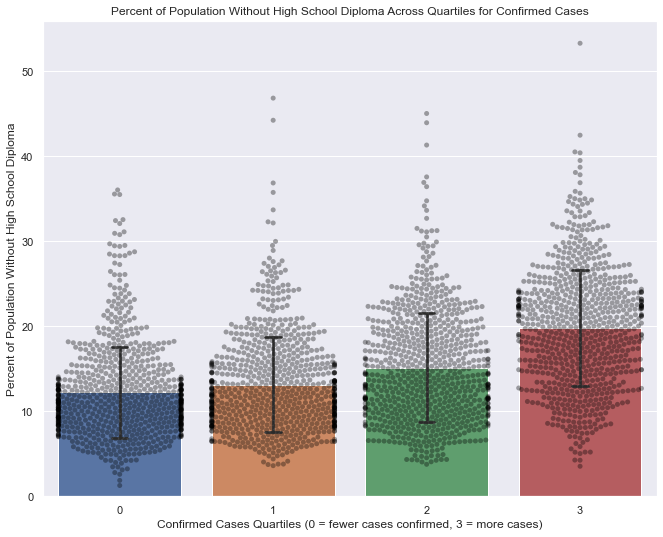

In [79]:
# Cases Quartiles and % without high school diploma

fig2a = sns.barplot(x="confirmed_quartile", y="no_diploma_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="confirmed_quartile", y="no_diploma_percent", data=select_counties, color="0", alpha=.35)
fig2a.set(xlabel='Confirmed Cases Quartiles (0 = fewer cases confirmed, 3 = more cases)', 
              ylabel='Percent of Population Without High School Diploma', 
              title='Percent of Population Without High School Diploma Across Quartiles for Confirmed Cases')
plt.show()

In [81]:
diploma_cases_0_mean = select_counties.loc[select_counties['confirmed_quartile'] == 0, 'no_diploma_percent'].mean()
diploma_cases_3_mean = select_counties.loc[select_counties['confirmed_quartile'] == 3, 'no_diploma_percent'].mean()


diploma_cases_0_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 0, 'no_diploma_percent'])
diploma_cases_3_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 3, 'no_diploma_percent'])

print("The mean percentage of people without a high school diploma in the bottom quartile",
      "(lowest Covid Cases) of Covid case rates is: ", 
      diploma_cases_0_mean, 
      "+/-", 
     diploma_cases_0_stdev)

print("The mean percentage of without a high school diploma in the top quartile",
      "(highest Covid Cases) of Covid case rates is: ", 
      diploma_cases_3_mean, 
      "+/-", 
     diploma_cases_3_stdev)

The mean percentage of people without a high school diploma in the bottom quartile (lowest Covid Cases) of Covid case rates is:  12.224881782945756 +/- 5.382416683889119
The mean percentage of without a high school diploma in the top quartile (highest Covid Cases) of Covid case rates is:  19.787815019255437 +/- 6.872740479106904


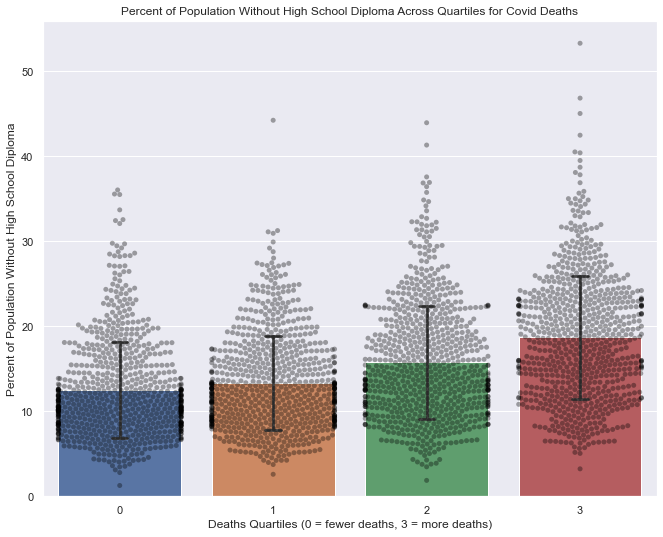

In [82]:
# Deaths Quartiles and % without high school diploma

fig2b = sns.barplot(x="deaths_quartile", y="no_diploma_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="deaths_quartile", y="no_diploma_percent", data=select_counties, color="0", alpha=.35)
fig2b.set(xlabel='Deaths Quartiles (0 = fewer deaths, 3 = more deaths)', 
              ylabel='Percent of Population Without High School Diploma', 
              title='Percent of Population Without High School Diploma Across Quartiles for Covid Deaths')
plt.show()

In [84]:
diploma_deaths_0_mean = select_counties.loc[select_counties['deaths_quartile'] == 0, 'no_diploma_percent'].mean()
diploma_deaths_3_mean = select_counties.loc[select_counties['deaths_quartile'] == 3, 'no_diploma_percent'].mean()


diploma_deaths_0_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 0, 'no_diploma_percent'])
diploma_deaths_3_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 3, 'no_diploma_percent'])

print("The mean percentage of people without a high school diploma in the bottom quartile",
      "(lowest Covid deaths) of Covid death rates is: ", 
      diploma_deaths_0_mean, 
      "+/-", 
     diploma_deaths_0_stdev)

print("The mean percentage of without a high school diploma in the top quartile",
      "(highest Covid deaths) of Covid death rates is: ", 
      diploma_deaths_3_mean, 
      "+/-", 
     diploma_deaths_3_stdev)

The mean percentage of people without a high school diploma in the bottom quartile (lowest Covid deaths) of Covid death rates is:  12.444471927555 +/- 5.647946957899815
The mean percentage of without a high school diploma in the top quartile (highest Covid deaths) of Covid death rates is:  18.690330166880592 +/- 7.23490157397044


From this data (the graphs as well as the means and standard deviations) we can see that as % of people without a high school diploma increases, covid incidence and deaths also increase. This trend is also supported by the distribution of % no diploma (scatterplot) across the 4 outcome buckets. However analysis demonstrated that because of the standard deviations, differences across these buckets were not significant. 

<b> Looking at Averages Across Quartiles: % of People without Health Insurance </b>

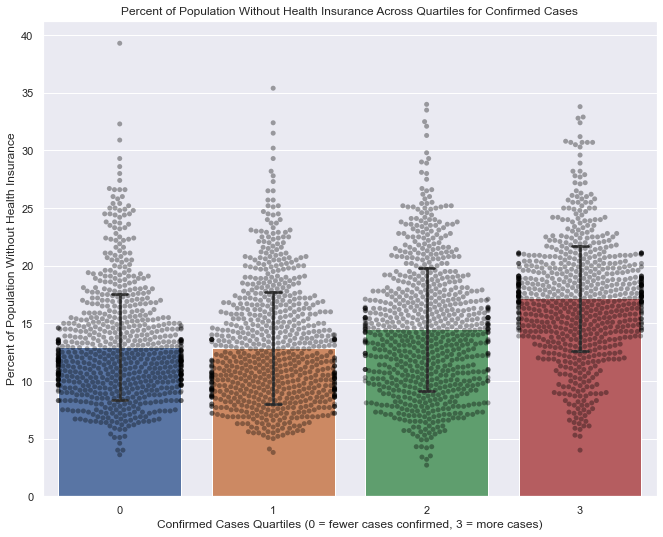

In [85]:
# Cases Quartiles and % without health insurance

fig3a = sns.barplot(x="confirmed_quartile", y="no_insurance_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="confirmed_quartile", y="no_insurance_percent", data=select_counties, color="0", alpha=.35)
fig3a.set(xlabel='Confirmed Cases Quartiles (0 = fewer cases confirmed, 3 = more cases)', 
              ylabel='Percent of Population Without Health Insurance', 
              title='Percent of Population Without Health Insurance Across Quartiles for Confirmed Cases')
plt.show()

In [86]:
insurance_cases_0_mean = select_counties.loc[select_counties['confirmed_quartile'] == 0, 'no_insurance_percent'].mean()
insurance_cases_3_mean = select_counties.loc[select_counties['confirmed_quartile'] == 3, 'no_insurance_percent'].mean()


insurance_cases_0_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 0, 'no_insurance_percent'])
insurance_cases_3_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 3, 'no_insurance_percent'])

print("The mean percentage of people without health insurance in the bottom quartile",
      "(lowest Covid Cases) of Covid case rates is: ", 
      insurance_cases_0_mean, 
      "+/-", 
     insurance_cases_0_stdev)

print("The mean percentage of without health insurance in the top quartile",
      "(highest Covid Cases) of Covid case rates is: ", 
      insurance_cases_3_mean, 
      "+/-", 
     insurance_cases_3_stdev)

The mean percentage of people without health insurance in the bottom quartile (lowest Covid Cases) of Covid case rates is:  12.985400516795853 +/- 4.602356815927279
The mean percentage of without health insurance in the top quartile (highest Covid Cases) of Covid case rates is:  17.170860077021818 +/- 4.577682607072107


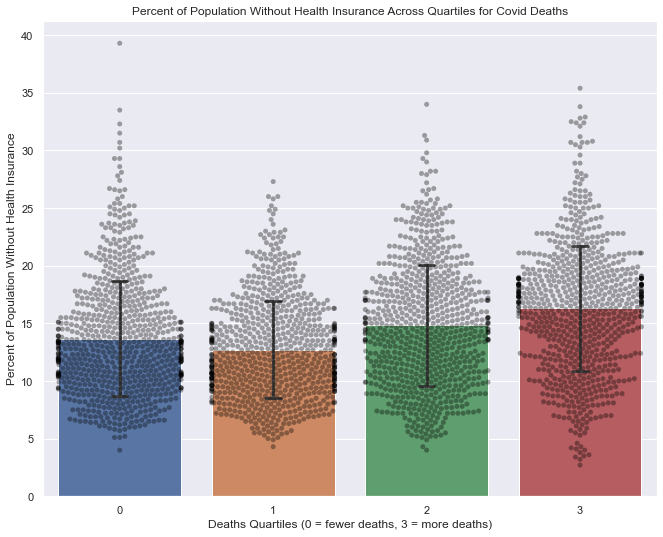

In [87]:
# Deaths Quartiles and % without health insurance

fig3b = sns.barplot(x="deaths_quartile", y="no_insurance_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="deaths_quartile", y="no_insurance_percent", data=select_counties, color="0", alpha=.35)
fig3b.set(xlabel='Deaths Quartiles (0 = fewer deaths, 3 = more deaths)', 
              ylabel='Percent of Population Without Health Insurance', 
              title='Percent of Population Without Health Insurance Across Quartiles for Covid Deaths')
plt.show()

In [88]:
insurance_deaths_0_mean = select_counties.loc[select_counties['deaths_quartile'] == 0, 'no_insurance_percent'].mean()
insurance_deaths_3_mean = select_counties.loc[select_counties['deaths_quartile'] == 3, 'no_insurance_percent'].mean()


insurance_deaths_0_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 0, 'no_insurance_percent'])
insurance_deaths_3_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 3, 'no_insurance_percent'])

print("The mean percentage of people without health insurance in the bottom quartile",
      "(lowest Covid deaths) of Covid death rate is: ", 
      insurance_deaths_0_mean, 
      "+/-", 
     insurance_deaths_0_stdev)

print("The mean percentage of without health insurance in the top quartile",
      "(highest Covid deaths) of Covid death rate is: ", 
      insurance_deaths_3_mean, 
      "+/-", 
     insurance_deaths_3_stdev)


The mean percentage of people without health insurance in the bottom quartile (lowest Covid deaths) of Covid death rate is:  13.676067270375148 +/- 5.0098461659883124
The mean percentage of without health insurance in the top quartile (highest Covid deaths) of Covid death rate is:  16.29897304236199 +/- 5.418726358198088


From this data (the graphs as well as the means and standard deviations) we can see that as % of people without a health insurance increases, covid incidene and deaths also increase. This trend is also supported by the distribution of % no insurance (scatterplot) across the 4 outcome buckets, however analysis demonstrated that because of the standard deviations, differences across these buckets were not significant. 

<b> Looking at Averages Across Quartiles: Poverty Rate </b>

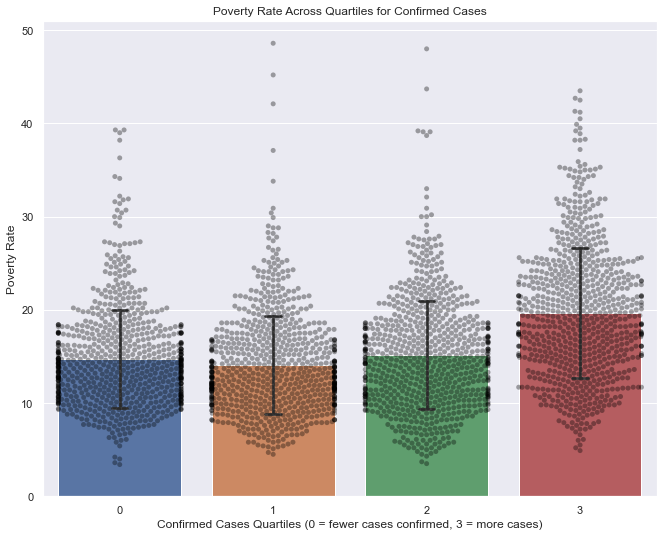

In [89]:
# Cases Quartiles and Poverty Rate

fig4a = sns.barplot(x="confirmed_quartile", y="poverty_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="confirmed_quartile", y="poverty_percent", data=select_counties, color="0", alpha=.35)
fig4a.set(xlabel='Confirmed Cases Quartiles (0 = fewer cases confirmed, 3 = more cases)', 
              ylabel='Poverty Rate', 
              title='Poverty Rate Across Quartiles for Confirmed Cases')
plt.show()

In [90]:
poverty_cases_0_mean = select_counties.loc[select_counties['confirmed_quartile'] == 0, 'poverty_percent'].mean()
poverty_cases_3_mean = select_counties.loc[select_counties['confirmed_quartile'] == 3, 'poverty_percent'].mean()


poverty_cases_0_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 0, 'poverty_percent'])
poverty_cases_3_stdev = stdev(select_counties.loc[select_counties['confirmed_quartile'] == 3, 'poverty_percent'])

print("The mean percentage of people below the poverty line in the bottom quartile",
      "(lowest Covid Cases) of Covid case rates is: ", 
      poverty_cases_0_mean, 
      "+/-", 
     poverty_cases_0_stdev)

print("The mean percentage of below the poverty line in the top quartile",
      "(highest Covid Cases) of Covid case rates is: ", 
      poverty_cases_3_mean, 
      "+/-", 
     poverty_cases_3_stdev)

The mean percentage of people below the poverty line in the bottom quartile (lowest Covid Cases) of Covid case rates is:  14.743669250646008 +/- 5.246582572735628
The mean percentage of below the poverty line in the top quartile (highest Covid Cases) of Covid case rates is:  19.649807445442878 +/- 6.990361291889907


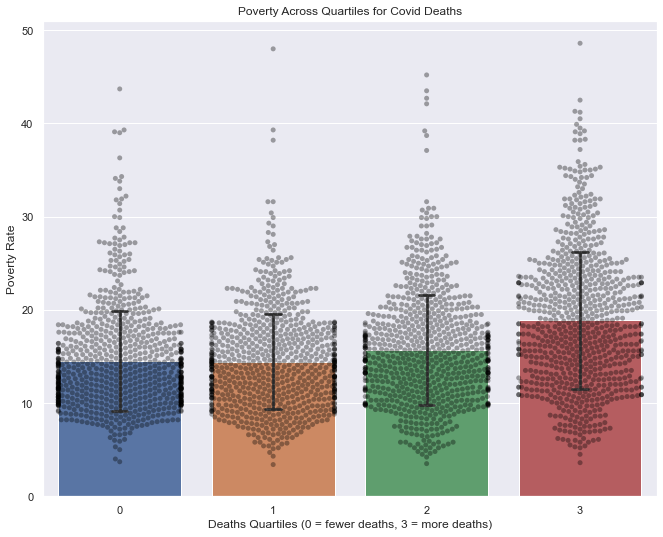

In [91]:
# Deaths Quartiles and Poverty Rate

fig4b = sns.barplot(x="deaths_quartile", y="poverty_percent", data=select_counties, capsize=.1, ci="sd")
sns.swarmplot(x="deaths_quartile", y="poverty_percent", data=select_counties, color="0", alpha=.35)
fig4b.set(xlabel='Deaths Quartiles (0 = fewer deaths, 3 = more deaths)', 
              ylabel='Poverty Rate', 
              title='Poverty Across Quartiles for Covid Deaths')
plt.show()

In [92]:
poverty_deaths_0_mean = select_counties.loc[select_counties['deaths_quartile'] == 0, 'poverty_percent'].mean()
poverty_deaths_3_mean = select_counties.loc[select_counties['deaths_quartile'] == 3, 'poverty_percent'].mean()


poverty_deaths_0_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 0, 'poverty_percent'])
poverty_deaths_3_stdev = stdev(select_counties.loc[select_counties['deaths_quartile'] == 3, 'poverty_percent'])

print("The mean percentage of people below the poverty line in the bottom quartile",
      "(lowest Covid deaths) of Covid death rates is: ", 
      poverty_deaths_0_mean, 
      "+/-", 
     poverty_deaths_0_stdev)

print("The mean percentage of below the poverty line in the top quartile",
      "(highest Covid deaths) of Covid death rates is: ", 
      poverty_deaths_3_mean, 
      "+/-", 
     poverty_deaths_3_stdev)


The mean percentage of people below the poverty line in the bottom quartile (lowest Covid deaths) of Covid death rates is:  14.527296248382921 +/- 5.389100260533456
The mean percentage of below the poverty line in the top quartile (highest Covid deaths) of Covid death rates is:  18.90346598202823 +/- 7.353167710254311


From this data (the graphs as well as the means and standard deviations) we can see that as % of people below the poverty line increases, covid incidence and deaths also increase. This trend is also supported by the distribution of % of people below the poverty line across the 4 outcome buckets (as seen in the scatterplot). However analysis demonstrated that because of the standard deviations, differences across these buckets were not significant. 

<b> Taken together, these plots reveal that when looking across Covid outcome and Covid death quartiles, a wide variety of the population is affected by the pandemic to similar degrees. This is demonstrated by the overlapping error bars even between the top and bottom quartiles when looking at features which may help explain the differences in outcome. These not significant results are most likley due to the pandemic's widespread effects, targeting various locations with different qualities, as represented by the large range in dots within an individual outcome bucket (quartile). From this, it is evident that the disparities we are seeing (differences between the top and bottom quartile) are not due to most of the data as a whole, but rather due to outliers. Since outliers drive disparities, I will now look at the effects of outliers on Covid cases and deaths. </b>

<b> I thought it would be interesting to examine the top 150 (top 5%) and bottom 150 counties (bottom 5%) across a variety of samples and observe the differences in confirmed cases and deaths across these 2 groups. 

<b> Disparities: % of Population Without High School Diploma and Covid Cases & Deaths </b>

In [93]:
# Bottom 150 values 
no_diploma_bottom = select_counties.nsmallest(150,['no_diploma_percent']) 

# Only Keep Variables I am interested in 
no_diploma_bottom = no_diploma_bottom[['state',
                         'county_name',
                         'no_diploma_percent',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
no_diploma_bottom['label']='Highest Rates of High School Degree' # Lowest Rates of Not Having a High School Degree


# Top 150 values 
no_diploma_top = select_counties.nlargest(150,['no_diploma_percent']) 

# Only Keep Variables I am interested in 
no_diploma_top = no_diploma_top[['state',
                         'county_name',
                         'no_diploma_percent',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
no_diploma_top['label']='Lowest Rates of High School Degree' 


# Join the datasets vertically
no_diploma_disparities = pd.concat([no_diploma_top, no_diploma_bottom], ignore_index=True)
no_diploma_disparities

state   county_name  no_diploma_percent  confirmed_per_1000  \
0        Texas         Starr             53.2813           49.363007   
1        Texas      Hudspeth             46.8290           10.004880   
2        Texas      Presidio             45.0207           12.915906   
3         Ohio        Holmes             44.2241            8.094120   
4        Texas        Zapata             43.9321           20.530308   
..         ...           ...                 ...                 ...   
295       Iowa         Mills              6.3050            9.226449   
296  Minnesota       Chisago              6.3181            6.596378   
297       Ohio          Wood              6.3222           11.274781   
298    Montana  Powder River              6.3232            1.235330   
299    Georgia       Fayette              6.3252           14.618071   

     deaths_per_1000                                label  
0           2.206780   Lowest Rates of High School Degree  
1           0.488043   Lowest Rates of High School Degree  
2           0.701951   Lowest Rates of High School Degree  
3           0.159602   Lowest Rates of High School Degree  
4           0.278377   Lowest Rates of High School Degree  
..               ...                                  ...  
295         0.066858  Highest Rates of High School Degree  
296         0.018273  Highest Rates of High School Degree  
297         0.492550  Highest Rates of High School Degree  
298         0.000000  Highest Rates of High School Degree  
299         0.386104  Highest Rates of High School Degree  

[300 rows x 6 columns]

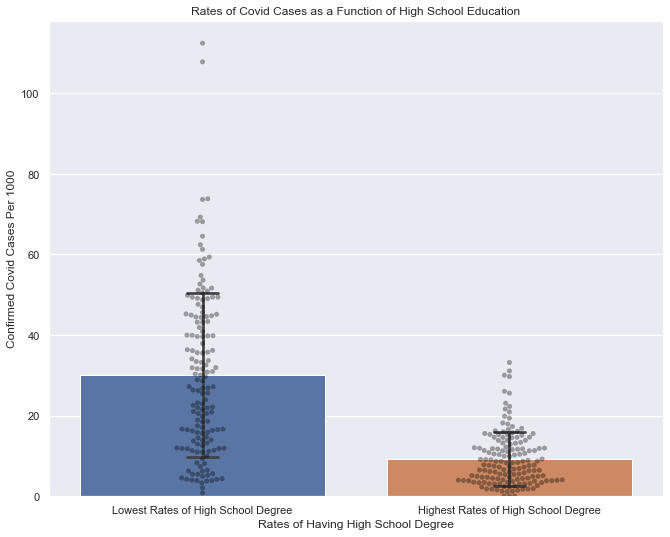

In [94]:
#Plot cases and Edu

fig5a = sns.barplot(x="label", y="confirmed_per_1000", data=no_diploma_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="confirmed_per_1000", data=no_diploma_disparities, color="0", alpha=.35)
fig5a.set(xlabel='Rates of Having High School Degree', 
              ylabel='Confirmed Covid Cases Per 1000', 
              title='Rates of Covid Cases as a Function of High School Education')
plt.show()

In [95]:
print("The mean number of Covid Cases per 1000 among the group with the lowest",
      "rates of having a high school degree is: ", 
       mean(no_diploma_top['confirmed_per_1000']),
      "+/-", 
       stdev(no_diploma_top['confirmed_per_1000']))


print("The mean number of Covid Cases per 1000 among the group with the highest",
      "rates of having a high school degree is: ", 
       mean(no_diploma_bottom['confirmed_per_1000']),
      "+/-", 
       stdev(no_diploma_bottom['confirmed_per_1000']))


The mean number of Covid Cases per 1000 among the group with the lowest rates of having a high school degree is:  30.014498379706982 +/- 20.386218573664856
The mean number of Covid Cases per 1000 among the group with the highest rates of having a high school degree is:  9.30804586248992 +/- 6.678148595837237


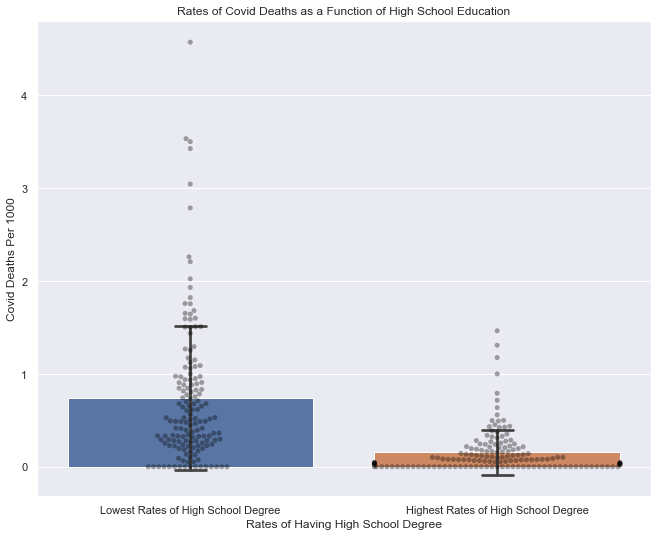

In [96]:
#Plot deaths and Edu

fig5b = sns.barplot(x="label", y="deaths_per_1000", data=no_diploma_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="deaths_per_1000", data=no_diploma_disparities, color="0", alpha=.35)
fig5b.set(xlabel='Rates of Having High School Degree', 
              ylabel='Covid Deaths Per 1000', 
              title='Rates of Covid Deaths as a Function of High School Education')
plt.show()

In [97]:
no_diploma_death_max = select_counties.nlargest(1,['deaths_per_1000']) 
print(no_diploma_death_max["no_diploma_percent"])
print("27.5%  of people do not have a high school diploma in Hancock, GA. The death rate per 1000 is 4.5 and the case rate is 43.3")
no_diploma_death_max

2769    27.5734
Name: no_diploma_percent, dtype: float64
27.5%  of people do not have a high school diploma in Hancock, GA. The death rate per 1000 is 4.5 and the case rate is 43.3


FIPS    state county_name NCHS_urbanization  total_population  \
2769  13141  Georgia     Hancock      Micropolitan              8535   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  \
2769       0.0        370      39            0.0           43.350908   

      deaths_per_1000  over_65_percent  female_percent  med_income  \
2769          4.56942             23.3            45.0     31716.0   

      per_capita_income  owner_occupied_percent  no_diploma_percent  \
2769              29917                    73.2             27.5734   

      no_insurance_percent  unemployed_percent poverty_percent  \
2769                  17.1                 7.3            33.5   

      confirmed_quartile  deaths_quartile  \
2769                   3                3   

      2018_rank_in_state_per_capita_income  2016_per_capita_income  \
2769                                   141                   27046   

      2017_per_capita_income  2017_per_capita_income_percent_change  \
2769                   28261                                    4.5   

      2018_per_capita_income_percent_change  \
2769                                    5.9   

      rank_in_state_2018_per_capita_income_percent_change  \
2769                                                  9     

      confirmed_per_100000  deaths_per_100000  
2769               4335.09             456.94

In [98]:
print("The mean number of Covid Deaths per 1000 among the group with the lowest",
      "rates of having a high school degree is: ", 
       mean(no_diploma_top['deaths_per_1000']),
      "+/-", 
       stdev(no_diploma_top['deaths_per_1000']))


print("The mean number of Covid Deaths per 1000 among the group with the highest",
      "rates of having a high school degree is: ", 
       mean(no_diploma_bottom['deaths_per_1000']),
      "+/-", 
       stdev(no_diploma_bottom['deaths_per_1000']))

The mean number of Covid Deaths per 1000 among the group with the lowest rates of having a high school degree is:  0.7416692624492341 +/- 0.7745600752022891
The mean number of Covid Deaths per 1000 among the group with the highest rates of having a high school degree is:  0.15477825789734476 +/- 0.2399757234224743


Once again, the data (the graphs as well as the means and standard deviations) shows that while having a high school education is associated with reduced rates of Covid cases and deaths, these differences are not significant, as error bars and ranges overlap. However, we start to see interesting data points, such as Hancock, GA, which has a the lowest rate of high school diplomas and high rates of Covid cases and death.  

<b> Disparities: % of People without Health Insurance and Covid Cases & Deaths </b>

In [99]:
# Bottom 150 values 
no_insurance_bottom = select_counties.nsmallest(150,['no_insurance_percent']) 

# Only Keep Variables I am interested in 
no_insurance_bottom = no_insurance_bottom[['state',
                         'county_name',
                         'no_insurance_percent',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
no_insurance_bottom['label']='Highest Rates of Health Insurance' # Lowest Rates of being Uninsured


# Top 150 values 
no_insurance_top = select_counties.nlargest(150,['no_insurance_percent']) 

# Only Keep Variables I am interested in 
no_insurance_top = no_insurance_top[['state',
                         'county_name',
                         'no_insurance_percent',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
no_insurance_top['label']='Lowest Rates of Insurance' 


# Join the datasets vertically
no_insurance_disparities = pd.concat([no_insurance_top, no_insurance_bottom], ignore_index=True)
no_insurance_disparities


state     county_name  no_insurance_percent  confirmed_per_1000  \
0      Alaska  Aleutians East                  39.3            0.583942   
1       Texas         Briscoe                  35.4            7.761966   
2       Texas           Mason                  34.0           18.024513   
3       Texas         Hidalgo                  33.8           33.660667   
4       Idaho           Clark                  33.5           19.498607   
..        ...             ...                   ...                 ...   
295      Iowa             Ida                   6.9            7.518797   
296      Iowa         Mahaska                   6.9           11.617435   
297  Illinois           Piatt                   6.9            5.965788   
298      Ohio          Warren                   6.9           11.157995   
299  Kentucky           Boone                   6.9           10.496146   

     deaths_per_1000                              label  
0           0.000000          Lowest Rates of Insurance  
1           0.646831          Lowest Rates of Insurance  
2           0.240327          Lowest Rates of Insurance  
3           1.497547          Lowest Rates of Insurance  
4           0.000000          Lowest Rates of Insurance  
..               ...                                ...  
295         0.000000  Highest Rates of Health Insurance  
296         0.810519  Highest Rates of Health Insurance  
297         0.000000  Highest Rates of Health Insurance  
298         0.185378  Highest Rates of Health Insurance  
299         0.193656  Highest Rates of Health Insurance  

[300 rows x 6 columns]

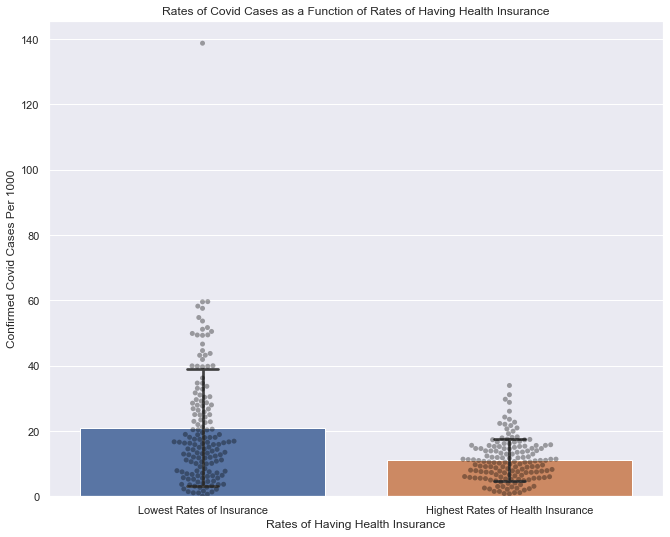

In [100]:
#Plot cases and Health Insurance

fig7a = sns.barplot(x="label", y="confirmed_per_1000", data=no_insurance_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="confirmed_per_1000", data=no_insurance_disparities, color="0", alpha=.35)
fig7a.set(xlabel='Rates of Having Health Insurance', 
              ylabel='Confirmed Covid Cases Per 1000', 
              title='Rates of Covid Cases as a Function of Rates of Having Health Insurance')
plt.show()

In [101]:
print("The mean number of Covid Cases per 1000 among the group with the lowest",
      "rates of having health insurance is: ", 
       mean(no_insurance_top['confirmed_per_1000']),
      "+/-", 
       stdev(no_insurance_top['confirmed_per_1000']))


print("The mean number of Covid Cases per 1000 among the group with the highest",
      "rates of having health insurance is: ", 
       mean(no_insurance_bottom['confirmed_per_1000']),
      "+/-", 
       stdev(no_insurance_bottom['confirmed_per_1000']))

The mean number of Covid Cases per 1000 among the group with the lowest rates of having health insurance is:  20.995794401993667 +/- 17.992813480051776
The mean number of Covid Cases per 1000 among the group with the highest rates of having health insurance is:  11.047958532742907 +/- 6.422934928359752


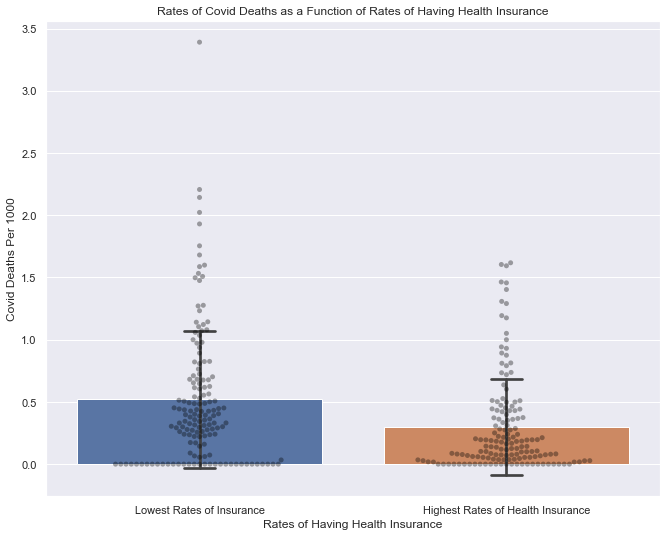

In [102]:
#Plot deaths and Health Insurance

fig7b = sns.barplot(x="label", y="deaths_per_1000", data=no_insurance_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="deaths_per_1000", data=no_insurance_disparities, color="0", alpha=.35)
fig7b.set(xlabel='Rates of Having Health Insurance', 
              ylabel='Covid Deaths Per 1000', 
              title='Rates of Covid Deaths as a Function of Rates of Having Health Insurance')
plt.show()

In [103]:
print("The mean number of Covid Deaths per 1000 among the group with the lowest",
      "rates of having health insurance is: ", 
       mean(no_insurance_top['deaths_per_1000']),
      "+/-", 
       stdev(no_insurance_top['deaths_per_1000']))


print("The mean number of Covid Deaths per 1000 among the group with the highest",
      "rates of having health insurance is: ", 
       mean(no_insurance_bottom['deaths_per_1000']),
      "+/-", 
       stdev(no_insurance_bottom['deaths_per_1000']))

The mean number of Covid Deaths per 1000 among the group with the lowest rates of having health insurance is:  0.5195946482058921 +/- 0.5514172561010426
The mean number of Covid Deaths per 1000 among the group with the highest rates of having health insurance is:  0.30167797579848965 +/- 0.38700348378640004


In [104]:
no_insurance_death_max = select_counties.nlargest(1,['deaths_per_1000']) 
print(no_insurance_death_max["no_insurance_percent"])
print("17.1%  of people do not have health insurance in Hancock, GA. The death rate per 1000 is 4.5 and the case rate is 43.3")
no_insurance_death_max

2769    17.1
Name: no_insurance_percent, dtype: float64
17.1%  of people do not have health insurance in Hancock, GA. The death rate per 1000 is 4.5 and the case rate is 43.3


FIPS    state county_name NCHS_urbanization  total_population  \
2769  13141  Georgia     Hancock      Micropolitan              8535   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  \
2769       0.0        370      39            0.0           43.350908   

      deaths_per_1000  over_65_percent  female_percent  med_income  \
2769          4.56942             23.3            45.0     31716.0   

      per_capita_income  owner_occupied_percent  no_diploma_percent  \
2769              29917                    73.2             27.5734   

      no_insurance_percent  unemployed_percent poverty_percent  \
2769                  17.1                 7.3            33.5   

      confirmed_quartile  deaths_quartile  \
2769                   3                3   

      2018_rank_in_state_per_capita_income  2016_per_capita_income  \
2769                                   141                   27046   

      2017_per_capita_income  2017_per_capita_income_percent_change  \
2769                   28261                                    4.5   

      2018_per_capita_income_percent_change  \
2769                                    5.9   

      rank_in_state_2018_per_capita_income_percent_change  \
2769                                                  9     

      confirmed_per_100000  deaths_per_100000  
2769               4335.09             456.94

Once again, the data (the graphs as well as the means and standard deviations) shows that while having a high school education is associated with reduced rates of Covid cases and deaths, these differences are not significant, as error bars and ranges overlap. In terms of looking at counties, we see that Hancock, GA, which was in the bottom 10% for high school graduates, is also in the bottom 10% for having health insurance (while having high levels of cases and deaths).

<b> Disparities: Median Household Income and Covid Cases & Deaths</b>

In [105]:
# Bottom 150 values 
med_income_top = select_counties.nlargest(150,['med_income']) 

# Only Keep Variables I am interested in 
med_income_top = med_income_top[['state',
                         'county_name',
                         'med_income',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
med_income_top['label']='Highest Median Household Income' 


# Top 150 values 
med_income_bottom = select_counties.nsmallest(150,['med_income']) 

# Only Keep Variables I am interested in 
med_income_bottom = med_income_bottom[['state',
                         'county_name',
                         'med_income',
                         'confirmed_per_1000', 
                         'deaths_per_1000']]

# Add a column for labels
med_income_bottom['label']='Lowest Median Household Income' 


# Join the datasets vertically
med_income_disparities = pd.concat([med_income_bottom, med_income_top], ignore_index=True)
med_income_disparities


state county_name  med_income  confirmed_per_1000  \
0           Alabama      Wilcox     25385.0           43.852345   
1      South Dakota     Buffalo     25973.0           54.554311   
2          Kentucky      Owsley     26278.0            8.290388   
3       Mississippi      Holmes     26449.0           58.865837   
4           Alabama       Perry     26814.0           50.917141   
..              ...         ...         ...                 ...   
295  North Carolina       Union     80428.0           18.438953   
296        Virginia   Albemarle     80392.0           10.276903   
297        Michigan     Oakland     80319.0           14.927533   
298    Rhode Island     Bristol     80231.0            7.321063   
299           Texas     Midland     80189.0           20.475779   

     deaths_per_1000                            label  
0           1.017670   Lowest Median Household Income  
1           1.461276   Lowest Median Household Income  
2           0.224065   Lowest Median Household Income  
3           3.042877   Lowest Median Household Income  
4           0.527093   Lowest Median Household Income  
..               ...                              ...  
295         0.229384  Highest Median Household Income  
296         0.178647  Highest Median Household Income  
297         0.936968  Highest Median Household Income  
298         0.000000  Highest Median Household Income  
299         0.444596  Highest Median Household Income  

[300 rows x 6 columns]

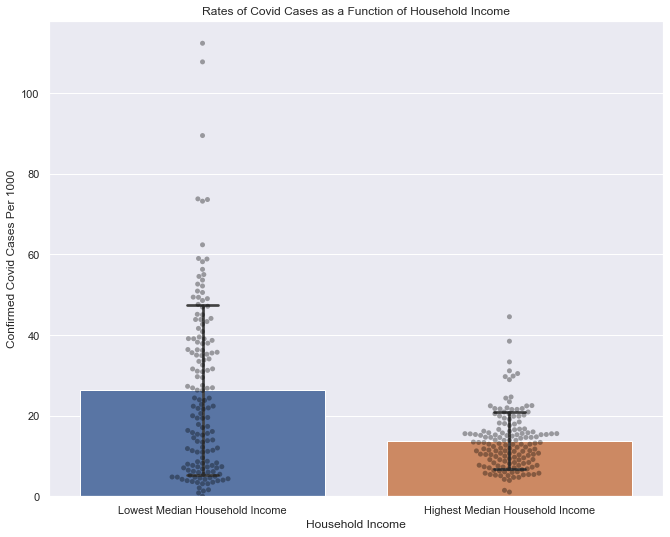

In [106]:
#Plot cases and Income

fig9a = sns.barplot(x="label", y="confirmed_per_1000", data=med_income_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="confirmed_per_1000", data=med_income_disparities, color="0", alpha=.35)
fig9a.set(xlabel='Household Income', 
              ylabel='Confirmed Covid Cases Per 1000', 
              title='Rates of Covid Cases as a Function of Household Income')
plt.show()

In [107]:
print("The mean number of Covid Cases per 1000 among the group with the lowest",
      "Median Household Income is: ", 
       mean(med_income_bottom['confirmed_per_1000']),
      "+/-", 
       stdev(med_income_bottom['confirmed_per_1000']))


print("The mean number of Covid Cases per 1000 among the group with the highest",
      "Median Household Income is: ", 
       mean(med_income_top['confirmed_per_1000']),
      "+/-", 
       stdev(med_income_top['confirmed_per_1000']))

The mean number of Covid Cases per 1000 among the group with the lowest Median Household Income is:  26.390571284975906 +/- 21.19401944307354
The mean number of Covid Cases per 1000 among the group with the highest Median Household Income is:  13.787605070166514 +/- 7.0530187093576915


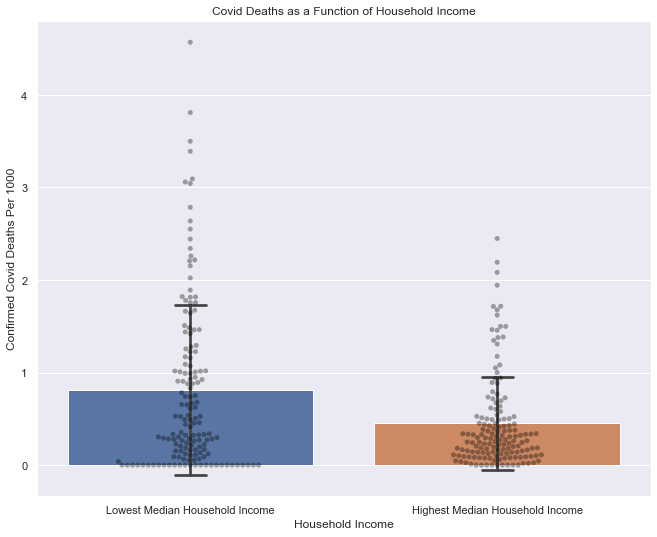

In [108]:
#Plot deaths and Income

fig9a = sns.barplot(x="label", y="deaths_per_1000", data=med_income_disparities, capsize=.1, ci="sd")
sns.swarmplot(x="label", y="deaths_per_1000", data=med_income_disparities, color="0", alpha=.35)
fig9a.set(xlabel='Household Income', 
              ylabel='Confirmed Covid Deaths Per 1000', 
              title='Covid Deaths as a Function of Household Income')
plt.show()

In [109]:
print("The mean number of Covid Deaths per 1000 among the group with the lowest",
      "Median Household Income is: ", 
       mean(med_income_bottom['deaths_per_1000']),
      "+/-", 
       stdev(med_income_bottom['deaths_per_1000']))


print("The mean number of Covid Deaths per 1000 among the group with the highest",
      "Median Household Income is: ", 
       mean(med_income_top['deaths_per_1000']),
      "+/-", 
       stdev(med_income_top['deaths_per_1000']))

The mean number of Covid Deaths per 1000 among the group with the lowest Median Household Income is:  0.8119671724982671 +/- 0.9183601065198065
The mean number of Covid Deaths per 1000 among the group with the highest Median Household Income is:  0.44937042171905267 +/- 0.5011008657160606


In [110]:
med_income_disparities_max = select_counties.nlargest(1,['deaths_per_1000']) 
print(med_income_disparities_max["med_income"])
print("The Median Household income in Hancock, GA is 31716.0. The death rate per 1000 is 4.5 and the case rate is 43.3")
med_income_disparities_max

2769    31716.0
Name: med_income, dtype: float64
The Median Household income in Hancock, GA is 31716.0. The death rate per 1000 is 4.5 and the case rate is 43.3


FIPS    state county_name NCHS_urbanization  total_population  \
2769  13141  Georgia     Hancock      Micropolitan              8535   

      num_beds  confirmed  deaths  beds_per_1000  confirmed_per_1000  \
2769       0.0        370      39            0.0           43.350908   

      deaths_per_1000  over_65_percent  female_percent  med_income  \
2769          4.56942             23.3            45.0     31716.0   

      per_capita_income  owner_occupied_percent  no_diploma_percent  \
2769              29917                    73.2             27.5734   

      no_insurance_percent  unemployed_percent poverty_percent  \
2769                  17.1                 7.3            33.5   

      confirmed_quartile  deaths_quartile  \
2769                   3                3   

      2018_rank_in_state_per_capita_income  2016_per_capita_income  \
2769                                   141                   27046   

      2017_per_capita_income  2017_per_capita_income_percent_change  \
2769                   28261                                    4.5   

      2018_per_capita_income_percent_change  \
2769                                    5.9   

      rank_in_state_2018_per_capita_income_percent_change  \
2769                                                  9     

      confirmed_per_100000  deaths_per_100000  
2769               4335.09             456.94

Once again, the data (the graphs as well as the means and standard deviations) shows that while having a higher median household income is associated with reduced rates of Covid cases and deaths, these differences are not significant, as error bars and ranges overlap. In terms of looking at counties, we see that Hancock, GA, which was in the bottom 10% for high school graduates and having health insurance (while having high levels of cases and deaths) is also in the bottom 10% for median household income, suggesting that in these factors are related to each other, and may be negativeley affecting Covid outcomes in the county.

## VI.  Conclusion

* Differences in outcome are dominated by outliers 
* There is more variability in outcomes for disadvantaged counties
* While these factors may not directly be responsible for increasing Covid cases or death rates, are are minor relationships between the features and outcome, while they may not play out significntly over all 3000+ counties, these effects are more present in disadvantaged communities